In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns

In [2]:
data_base_path_ema = '../data/with-ema'
data_base_path_no_ema = '../data/no-ema'
sizes = [
        "pythia-70m-deduped", "pythia-160m-deduped",
        "pythia-410m-deduped", "pythia-1b-deduped",
        "pythia-1.4b-deduped", "pythia-2.8b-deduped",
        "pythia-6.9b-deduped", "pythia-12b-deduped"
    ]


def analyze_ppl_across_models(sizes, window, data_base_path):
    """
    Analyze perplexity across different model sizes and create visualization plots.
    
    Parameters:
    sizes (list): List of model size names
    window (int): Window size for analysis
    data_base_path (str): Base path to the data files
    transform_for_plotting_func (function): Function to transform data for plotting
    
    Returns:
    tuple: Figure object, max_results list, and avg_results list
    """
    # Create figure with 4x4 grid
    fig, axes = plt.subplots(4, 2, figsize=(20, 20))
    axes = axes.flatten()  # Flatten to make indexing easier

    # Plot each model's data
    max_results = []
    avg_results = []
    
    for idx, size in enumerate(sizes):
        # Read and process data
        path = f'{data_base_path}/sliding_windows/{window}/{size}-label.jsonl'
        col_name = f'{size}_window_ppls'
        ppl_df = pd.read_json(path_or_buf=path, lines=True)
        ppl_df['label'] = np.where(ppl_df['numscores'] < 3, 0, 1)
        transform_for_plotting(
            df=ppl_df,
            list_column=col_name,
            label_column="label",
            model_name=size,
            label_name="TALD",
            ax=axes[idx],
            window=window
        )   
        # Calculate and store statistics
        ppl_df['max_values'] = ppl_df[col_name].apply(lambda x: max(x) if x else None)
        max_r = scipy.stats.spearmanr(ppl_df["max_values"], ppl_df['numscores'])
        max_results.append(f"{size}\nSpearman rho: {max_r[0]:.3f}\tp-value: {max_r[1]:.3f}")
        
        avg_r = scipy.stats.spearmanr(ppl_df[f"{size}_avg_ppl"], ppl_df['numscores'])
        avg_results.append(f"{size}\nSpearman rho: {avg_r[0]:.3f}\tp-value: {avg_r[1]:.3f}")

    # Add overall title
    fig.suptitle('PPL Analysis Across Different Model Sizes', fontsize=16, y=1.02)

    # Adjust layout
    plt.tight_layout()
    
    return fig, max_results, avg_results

def transform_for_plotting(df, list_column, label_column, model_name, label_name, ax, window):
    """
    Transform and plot data on a specified axis
    """
    # Create rows for each value in the lists
    transformed_data = []
    
    for idx, row in df.iterrows():
        values = row[list_column]
        label = row[label_column]
        
        # Create a row for each value in the list
        for pos, value in enumerate(values):
            transformed_data.append({
                'position': pos,
                'value': value,
                'label': label,
                'series': idx
            })
    
    plotable_df = pd.DataFrame(transformed_data)
    
    # Plot on the specified axis
    sns.lineplot(
        data=plotable_df,
        x='position',
        y='value',
        hue='label',
        markers=True,
        dashes=False,
        ax=ax
    )
    ax.set_xlabel('Index')
    ax.set_ylabel('PPL')
    ax.set_title(f"{label_name} vs {window} Sliding Window PPL\n{model_name}")

## Sliding Window of 8

### Transcripts with aligned EMA


Max PPL Results:
pythia-70m-deduped
Spearman rho: 0.383	p-value: 0.000
pythia-160m-deduped
Spearman rho: 0.376	p-value: 0.000
pythia-410m-deduped
Spearman rho: 0.379	p-value: 0.000
pythia-1b-deduped
Spearman rho: 0.329	p-value: 0.000
pythia-1.4b-deduped
Spearman rho: 0.327	p-value: 0.000
pythia-2.8b-deduped
Spearman rho: 0.320	p-value: 0.000
pythia-6.9b-deduped
Spearman rho: 0.317	p-value: 0.000
pythia-12b-deduped
Spearman rho: 0.311	p-value: 0.000


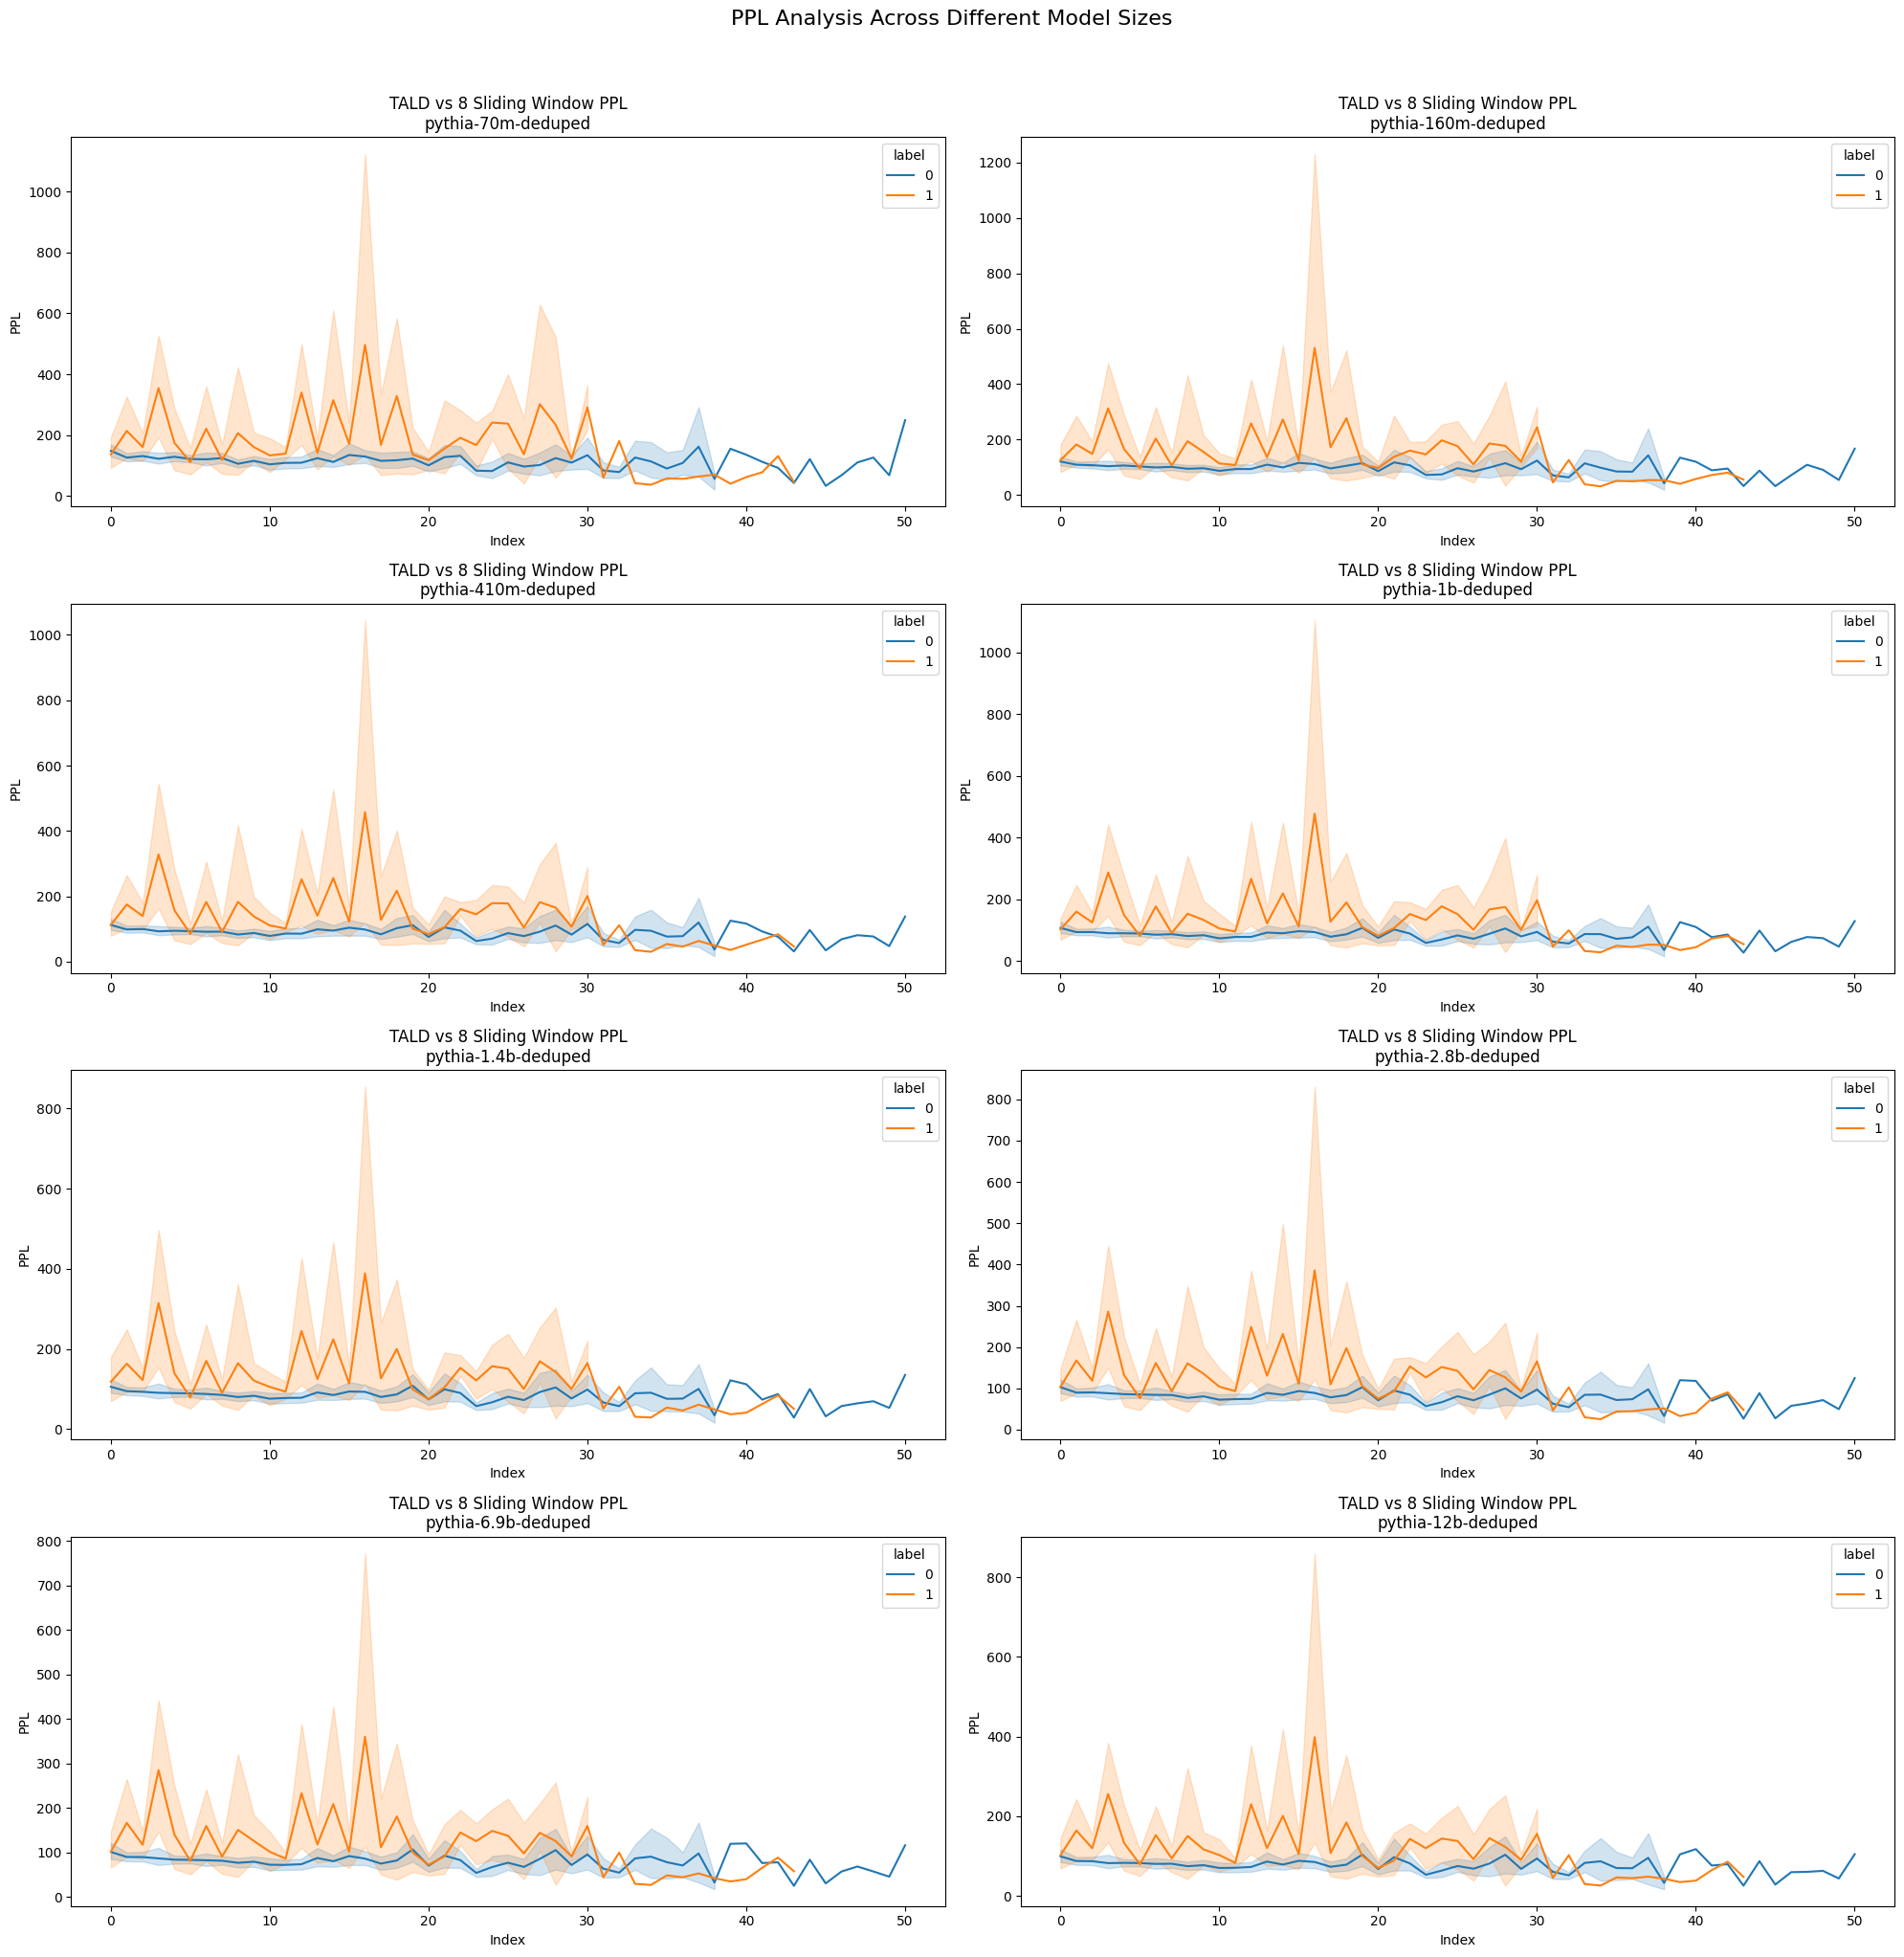

In [3]:
window = 8
fig, max_results, avg_results = analyze_ppl_across_models(
    sizes, window, data_base_path_ema
)
print("\nMax PPL Results:")
for result in max_results:
    print(result)

In [4]:
print("\nAverage PPL Results:")
for result in avg_results:
    print(result)


Average PPL Results:
pythia-70m-deduped
Spearman rho: 0.208	p-value: 0.003
pythia-160m-deduped
Spearman rho: 0.232	p-value: 0.001
pythia-410m-deduped
Spearman rho: 0.255	p-value: 0.000
pythia-1b-deduped
Spearman rho: 0.242	p-value: 0.001
pythia-1.4b-deduped
Spearman rho: 0.250	p-value: 0.000
pythia-2.8b-deduped
Spearman rho: 0.243	p-value: 0.001
pythia-6.9b-deduped
Spearman rho: 0.247	p-value: 0.000
pythia-12b-deduped
Spearman rho: 0.255	p-value: 0.000


### Transcripts with TALD score only


Max PPL Results:
pythia-70m-deduped
Spearman rho: 0.358	p-value: 0.000
pythia-160m-deduped
Spearman rho: 0.354	p-value: 0.000
pythia-410m-deduped
Spearman rho: 0.342	p-value: 0.000
pythia-1b-deduped
Spearman rho: 0.316	p-value: 0.000
pythia-1.4b-deduped
Spearman rho: 0.323	p-value: 0.000
pythia-2.8b-deduped
Spearman rho: 0.306	p-value: 0.000
pythia-6.9b-deduped
Spearman rho: 0.314	p-value: 0.000
pythia-12b-deduped
Spearman rho: 0.309	p-value: 0.000


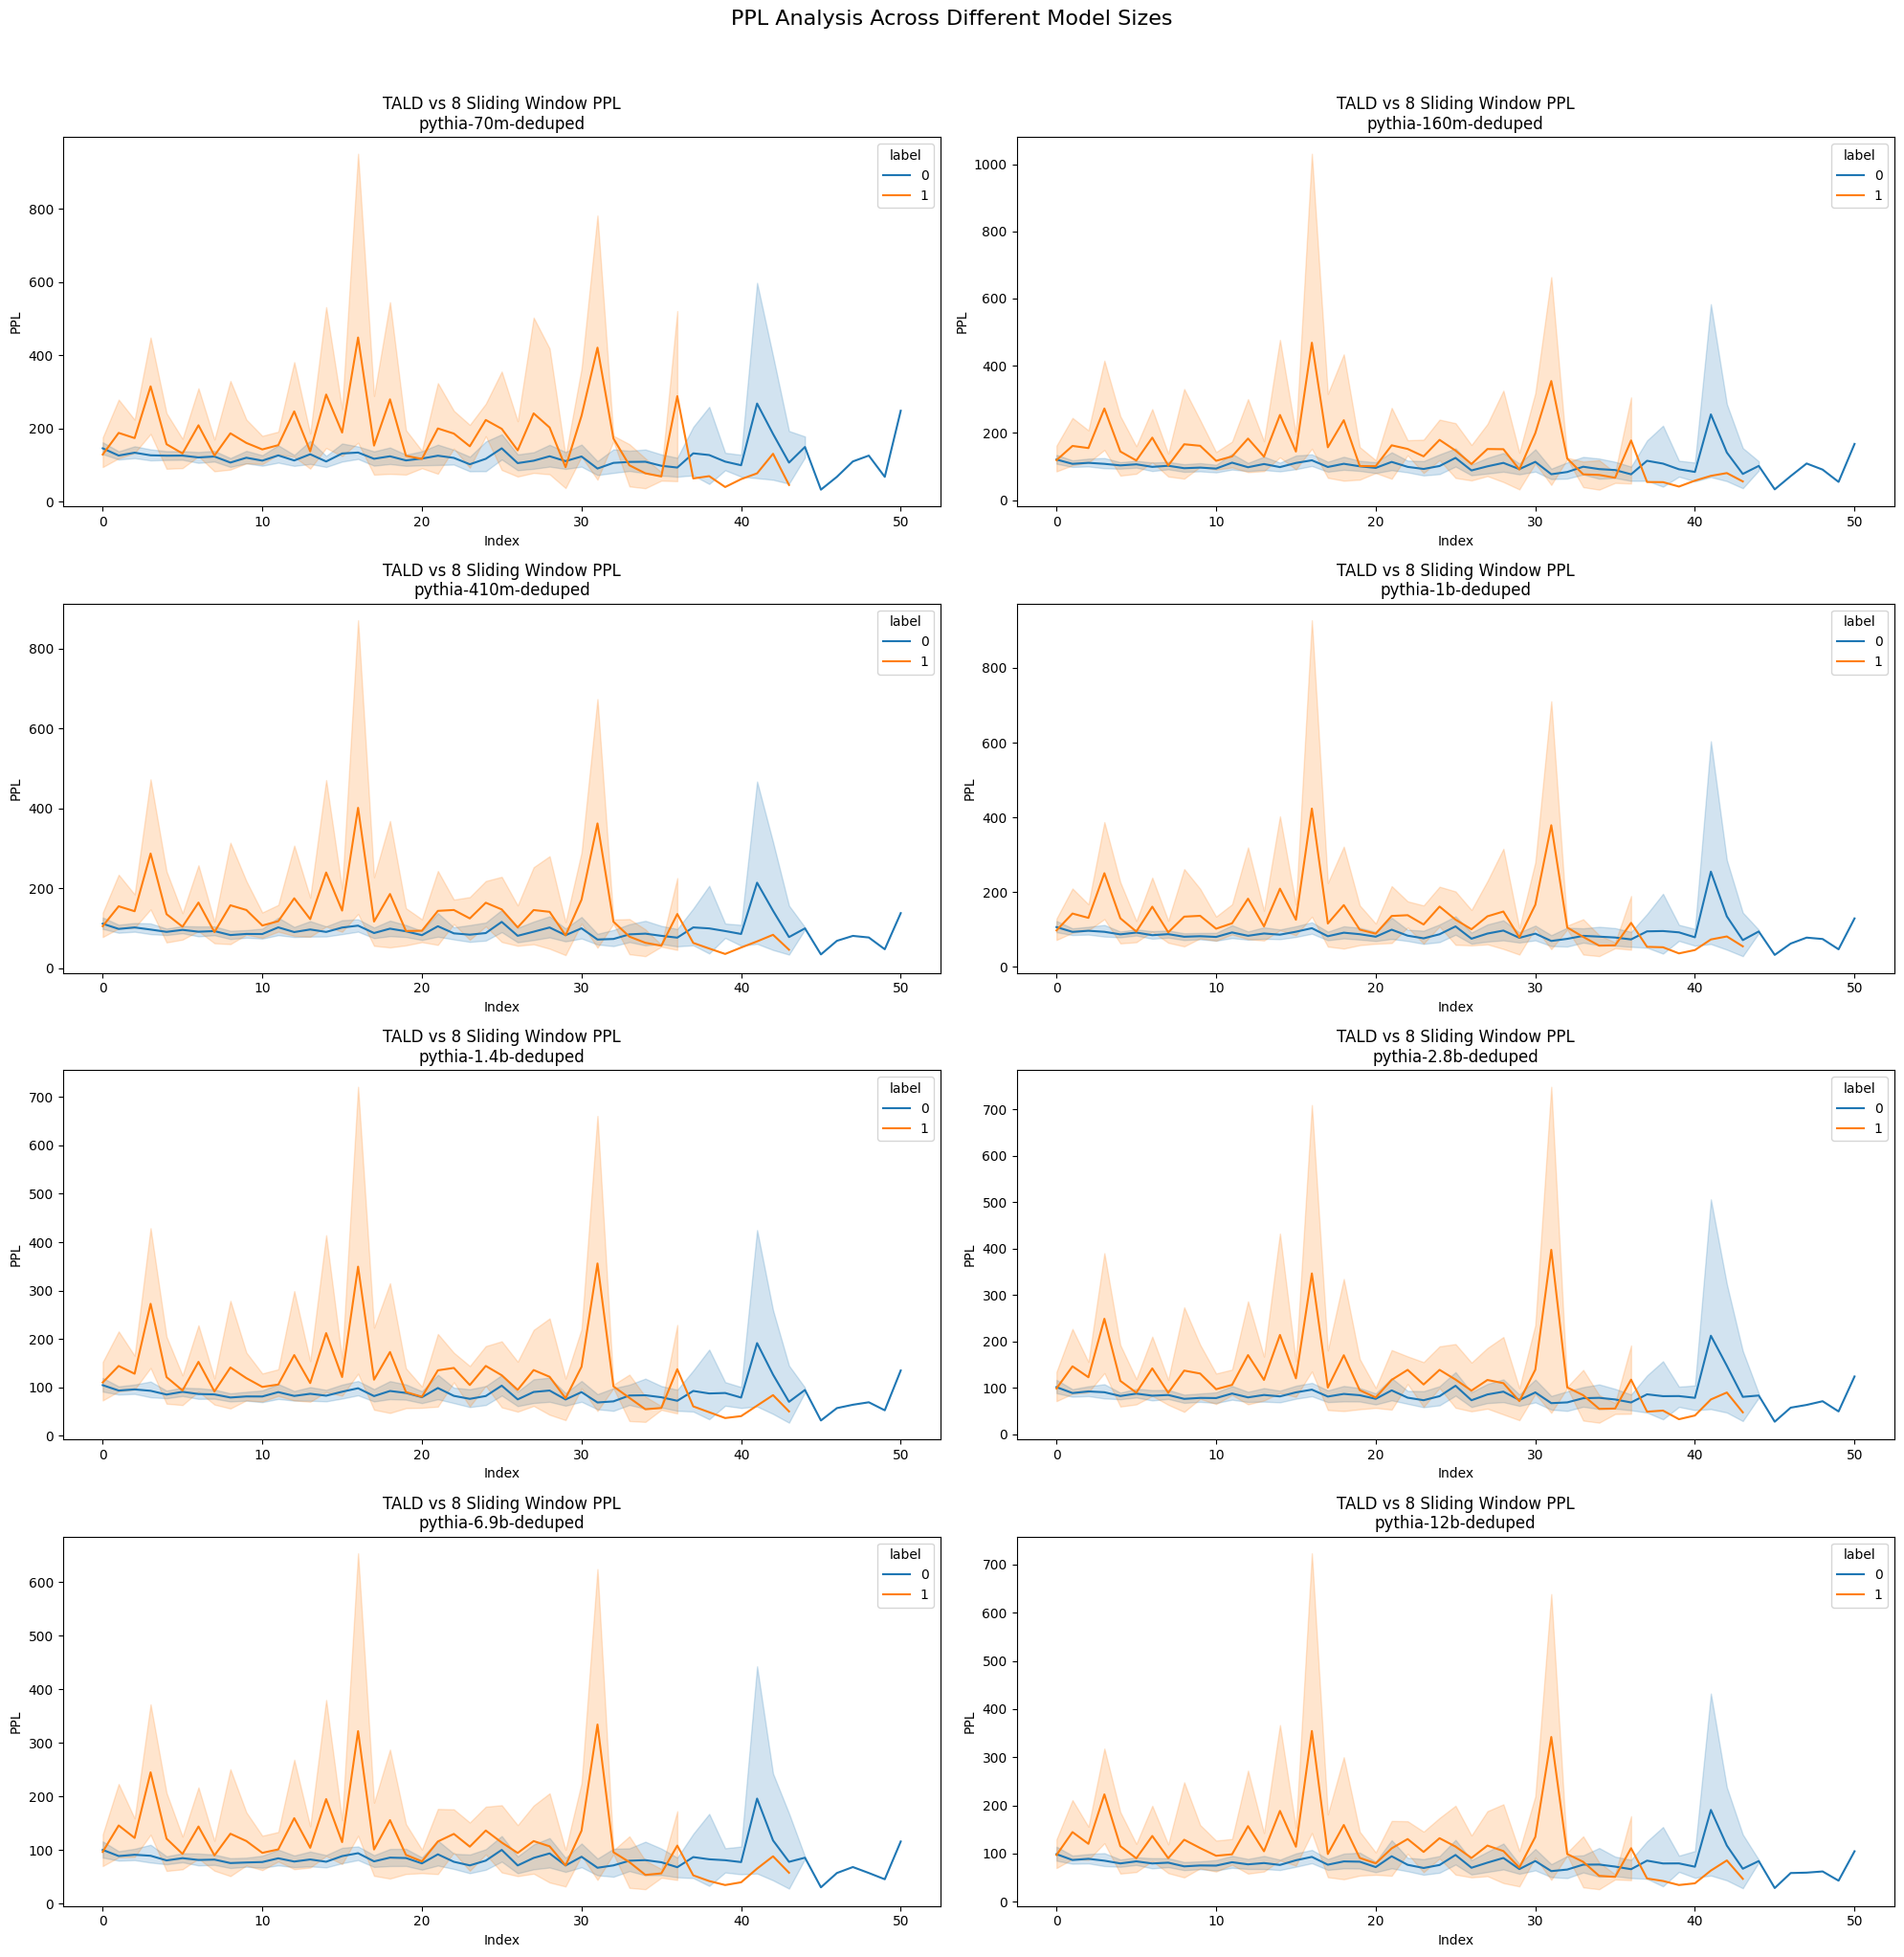

In [5]:
fig, max_results, avg_results = analyze_ppl_across_models(
    sizes, window, data_base_path_no_ema
)
print("\nMax PPL Results:")
for result in max_results:
    print(result)

In [6]:
print("\nAverage PPL Results:")
for result in avg_results:
    print(result)


Average PPL Results:
pythia-70m-deduped
Spearman rho: 0.180	p-value: 0.005
pythia-160m-deduped
Spearman rho: 0.211	p-value: 0.001
pythia-410m-deduped
Spearman rho: 0.220	p-value: 0.001
pythia-1b-deduped
Spearman rho: 0.213	p-value: 0.001
pythia-1.4b-deduped
Spearman rho: 0.221	p-value: 0.000
pythia-2.8b-deduped
Spearman rho: 0.208	p-value: 0.001
pythia-6.9b-deduped
Spearman rho: 0.213	p-value: 0.001
pythia-12b-deduped
Spearman rho: 0.218	p-value: 0.001


## Sliding Window of 16

### Transcripts with aligned EMA


Max PPL Results:
pythia-70m-deduped
Spearman rho: 0.364	p-value: 0.000
pythia-160m-deduped
Spearman rho: 0.365	p-value: 0.000
pythia-410m-deduped
Spearman rho: 0.332	p-value: 0.000
pythia-1b-deduped
Spearman rho: 0.308	p-value: 0.000
pythia-1.4b-deduped
Spearman rho: 0.280	p-value: 0.000
pythia-2.8b-deduped
Spearman rho: 0.302	p-value: 0.000
pythia-6.9b-deduped
Spearman rho: 0.287	p-value: 0.000
pythia-12b-deduped
Spearman rho: 0.292	p-value: 0.000


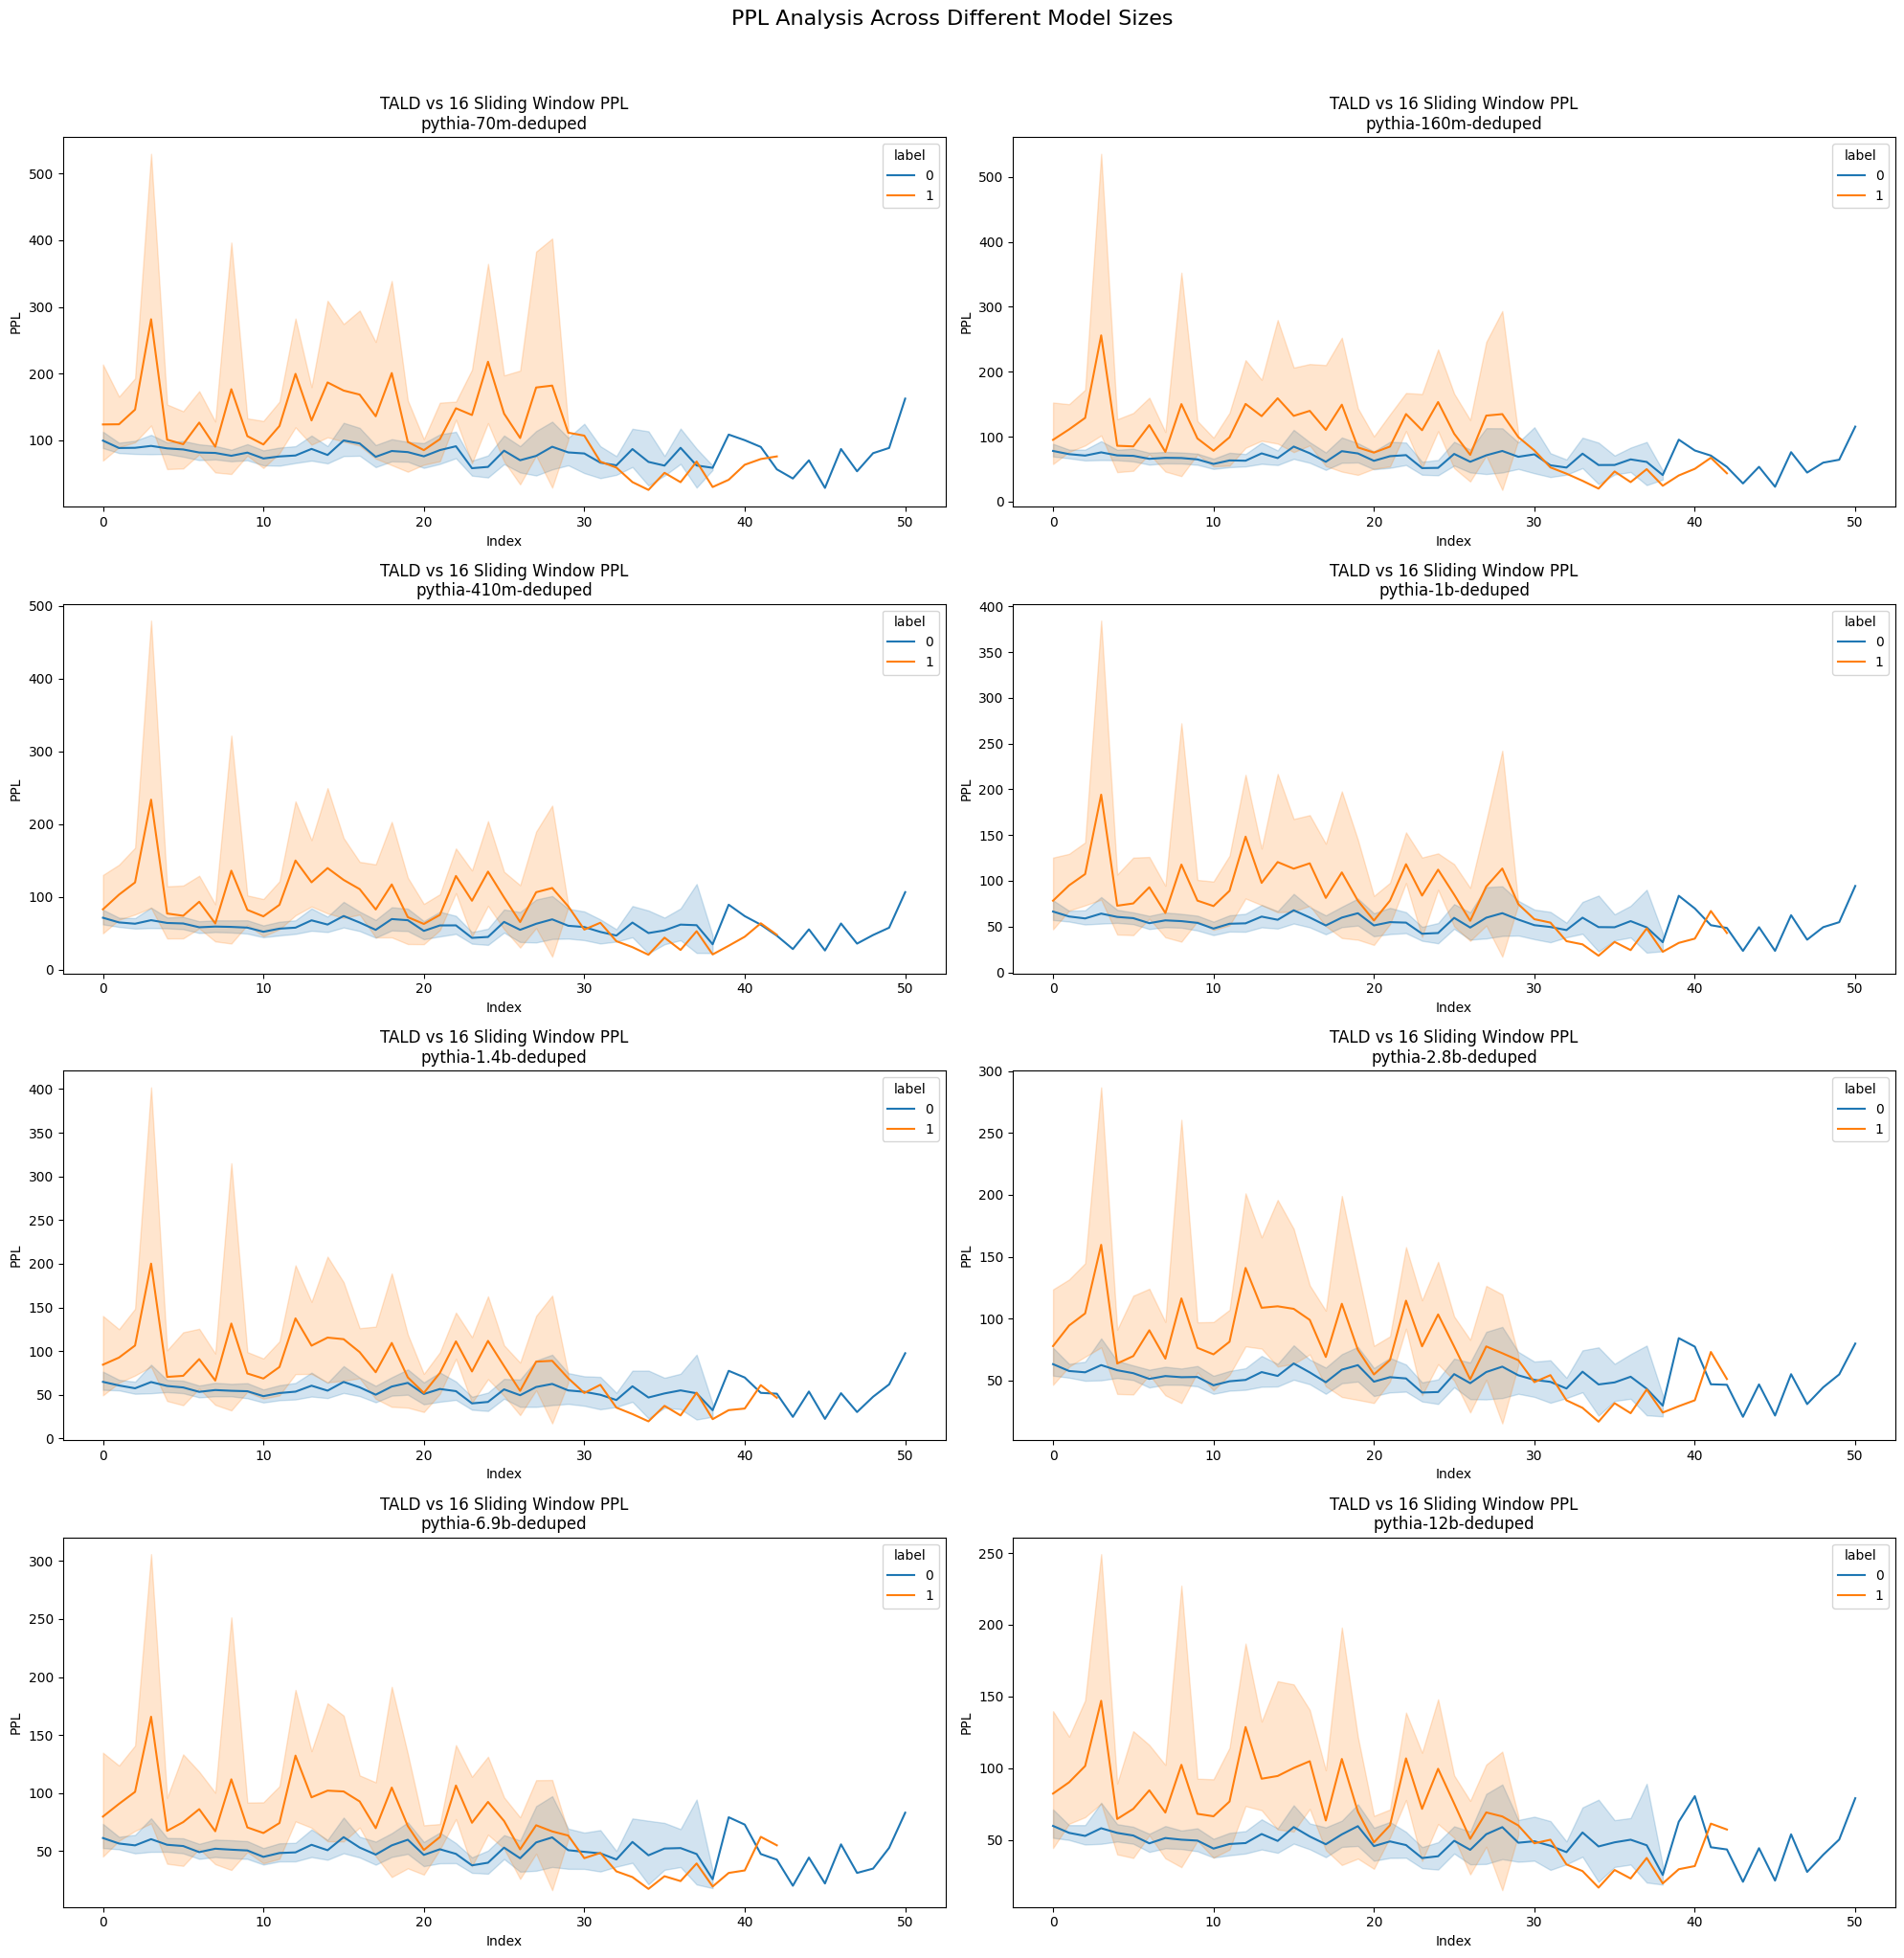

In [7]:
window = 16
fig, max_results, avg_results = analyze_ppl_across_models(
    sizes, window, data_base_path_ema
)
print("\nMax PPL Results:")
for result in max_results:
    print(result)

In [8]:
print("\nAverage PPL Results:")
for result in avg_results:
    print(result)


Average PPL Results:
pythia-70m-deduped
Spearman rho: 0.199	p-value: 0.005
pythia-160m-deduped
Spearman rho: 0.232	p-value: 0.001
pythia-410m-deduped
Spearman rho: 0.245	p-value: 0.001
pythia-1b-deduped
Spearman rho: 0.227	p-value: 0.001
pythia-1.4b-deduped
Spearman rho: 0.235	p-value: 0.001
pythia-2.8b-deduped
Spearman rho: 0.225	p-value: 0.002
pythia-6.9b-deduped
Spearman rho: 0.226	p-value: 0.001
pythia-12b-deduped
Spearman rho: 0.235	p-value: 0.001


### Transcripts with TALD score only


Max PPL Results:
pythia-70m-deduped
Spearman rho: 0.357	p-value: 0.000
pythia-160m-deduped
Spearman rho: 0.352	p-value: 0.000
pythia-410m-deduped
Spearman rho: 0.331	p-value: 0.000
pythia-1b-deduped
Spearman rho: 0.312	p-value: 0.000
pythia-1.4b-deduped
Spearman rho: 0.289	p-value: 0.000
pythia-2.8b-deduped
Spearman rho: 0.302	p-value: 0.000
pythia-6.9b-deduped
Spearman rho: 0.299	p-value: 0.000
pythia-12b-deduped
Spearman rho: 0.294	p-value: 0.000


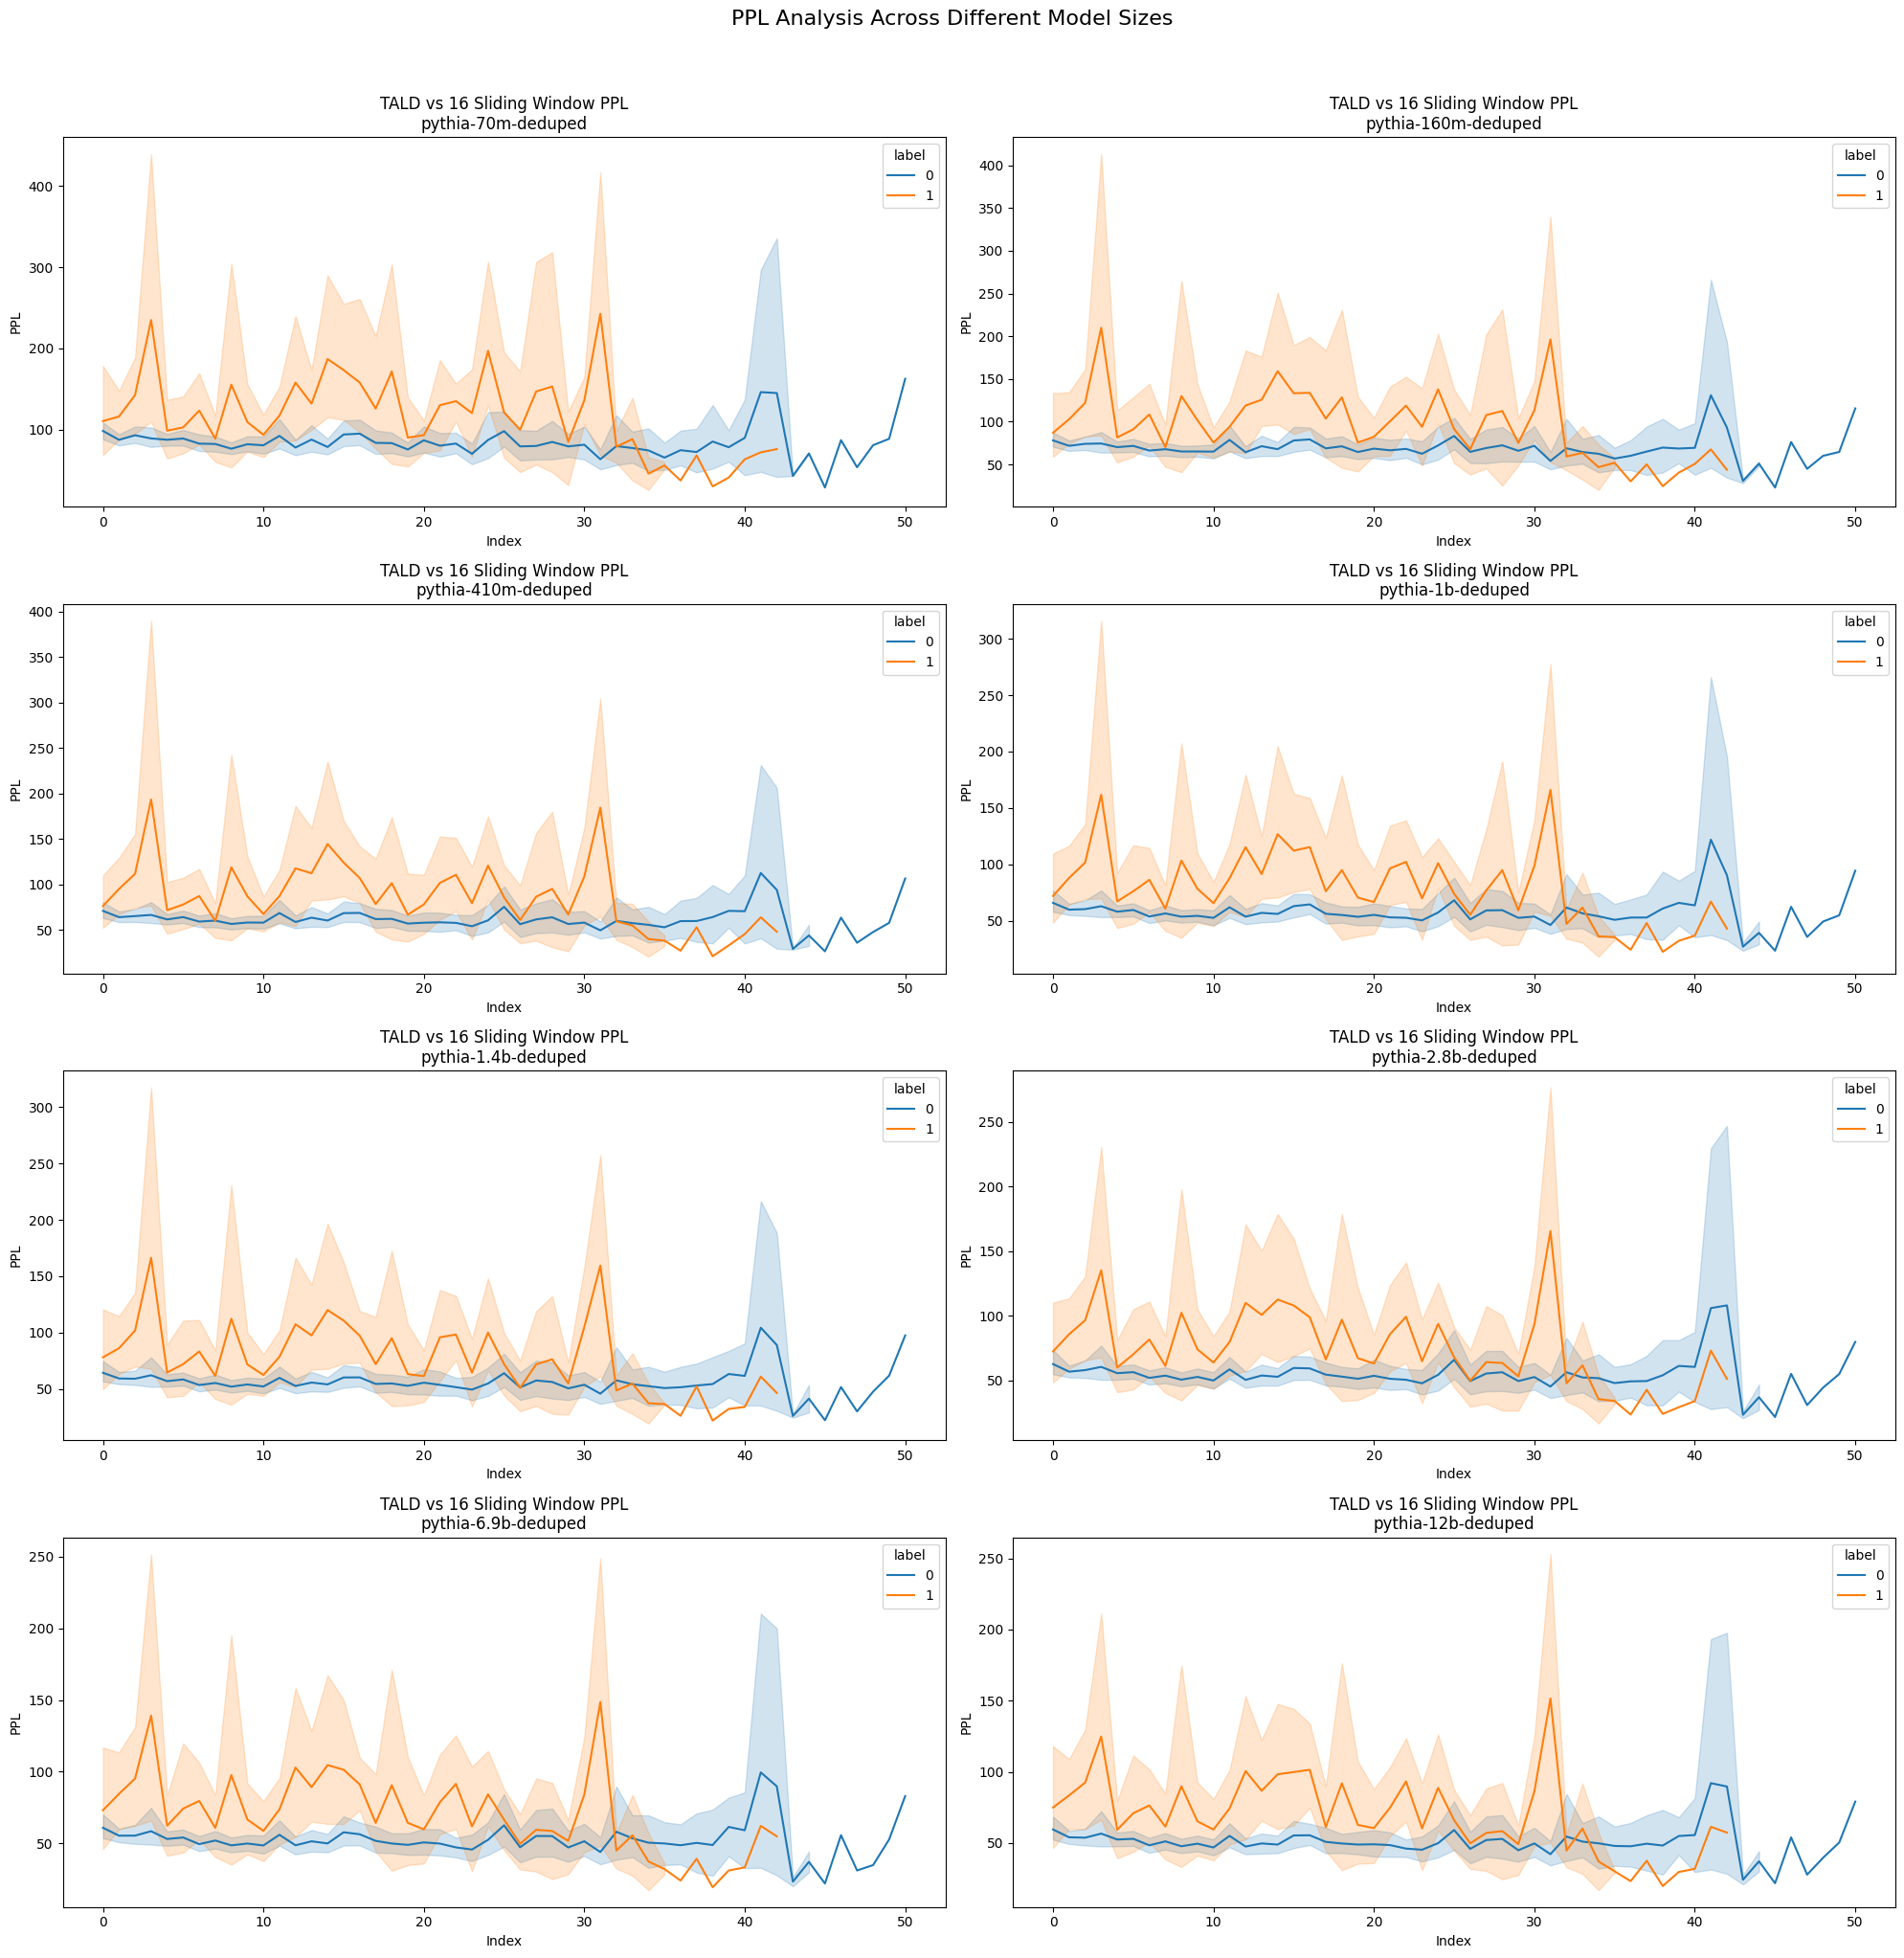

In [9]:
fig, max_results, avg_results = analyze_ppl_across_models(
    sizes, window, data_base_path_no_ema
)
print("\nMax PPL Results:")
for result in max_results:
    print(result)

In [10]:
print("\nAverage PPL Results:")
for result in avg_results:
    print(result)


Average PPL Results:
pythia-70m-deduped
Spearman rho: 0.175	p-value: 0.006
pythia-160m-deduped
Spearman rho: 0.213	p-value: 0.001
pythia-410m-deduped
Spearman rho: 0.223	p-value: 0.000
pythia-1b-deduped
Spearman rho: 0.214	p-value: 0.001
pythia-1.4b-deduped
Spearman rho: 0.219	p-value: 0.001
pythia-2.8b-deduped
Spearman rho: 0.207	p-value: 0.001
pythia-6.9b-deduped
Spearman rho: 0.211	p-value: 0.001
pythia-12b-deduped
Spearman rho: 0.217	p-value: 0.001


## Sliding Window of 32

### Transcripts with aligned EMA


Max PPL Results:
pythia-70m-deduped
Spearman rho: 0.446	p-value: 0.000
pythia-160m-deduped
Spearman rho: 0.444	p-value: 0.000
pythia-410m-deduped
Spearman rho: 0.434	p-value: 0.000
pythia-1b-deduped
Spearman rho: 0.446	p-value: 0.000
pythia-1.4b-deduped
Spearman rho: 0.419	p-value: 0.000
pythia-2.8b-deduped
Spearman rho: 0.444	p-value: 0.000
pythia-6.9b-deduped
Spearman rho: 0.426	p-value: 0.000
pythia-12b-deduped
Spearman rho: 0.422	p-value: 0.000


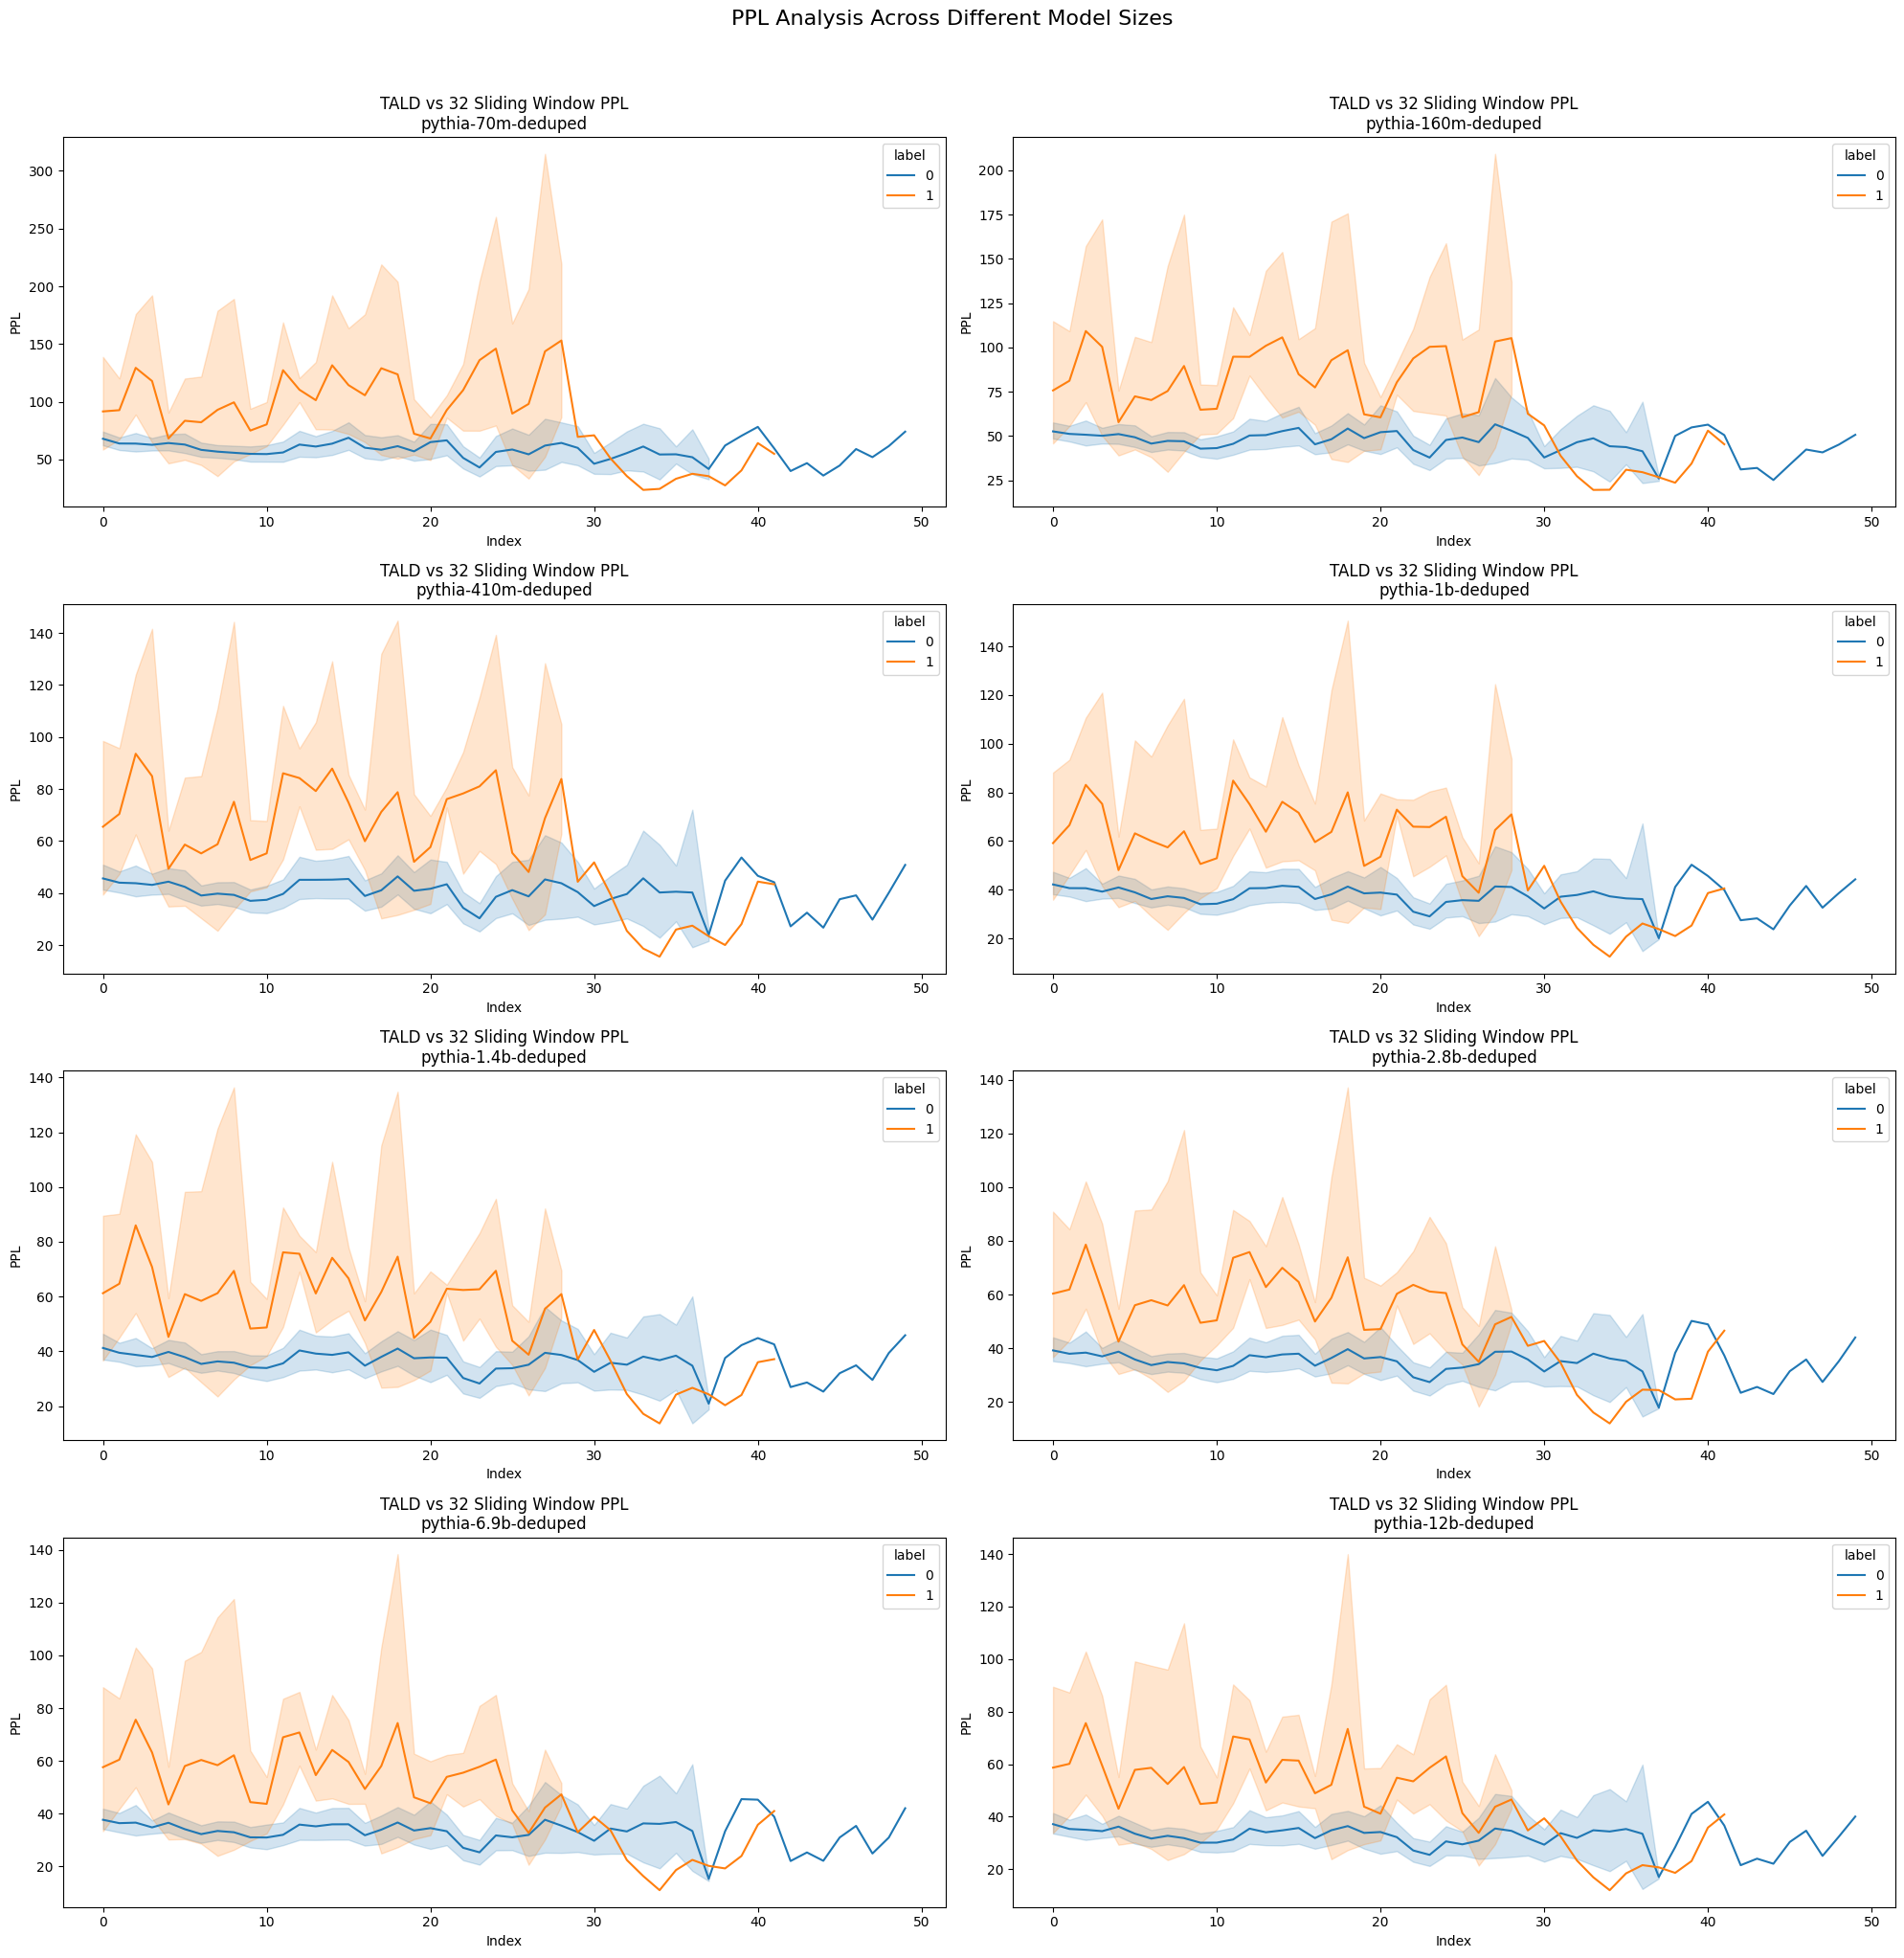

In [11]:
window = 32
fig, max_results, avg_results = analyze_ppl_across_models(
    sizes, window, data_base_path_ema
)
print("\nMax PPL Results:")
for result in max_results:
    print(result)

In [12]:
print("\nAverage PPL Results:")
for result in avg_results:
    print(result)


Average PPL Results:
pythia-70m-deduped
Spearman rho: 0.239	p-value: 0.001
pythia-160m-deduped
Spearman rho: 0.255	p-value: 0.000
pythia-410m-deduped
Spearman rho: 0.274	p-value: 0.000
pythia-1b-deduped
Spearman rho: 0.278	p-value: 0.000
pythia-1.4b-deduped
Spearman rho: 0.285	p-value: 0.000
pythia-2.8b-deduped
Spearman rho: 0.285	p-value: 0.000
pythia-6.9b-deduped
Spearman rho: 0.280	p-value: 0.000
pythia-12b-deduped
Spearman rho: 0.284	p-value: 0.000


### Transcripts with TALD score only


Max PPL Results:
pythia-70m-deduped
Spearman rho: 0.419	p-value: 0.000
pythia-160m-deduped
Spearman rho: 0.424	p-value: 0.000
pythia-410m-deduped
Spearman rho: 0.431	p-value: 0.000
pythia-1b-deduped
Spearman rho: 0.429	p-value: 0.000
pythia-1.4b-deduped
Spearman rho: 0.417	p-value: 0.000
pythia-2.8b-deduped
Spearman rho: 0.431	p-value: 0.000
pythia-6.9b-deduped
Spearman rho: 0.414	p-value: 0.000
pythia-12b-deduped
Spearman rho: 0.415	p-value: 0.000


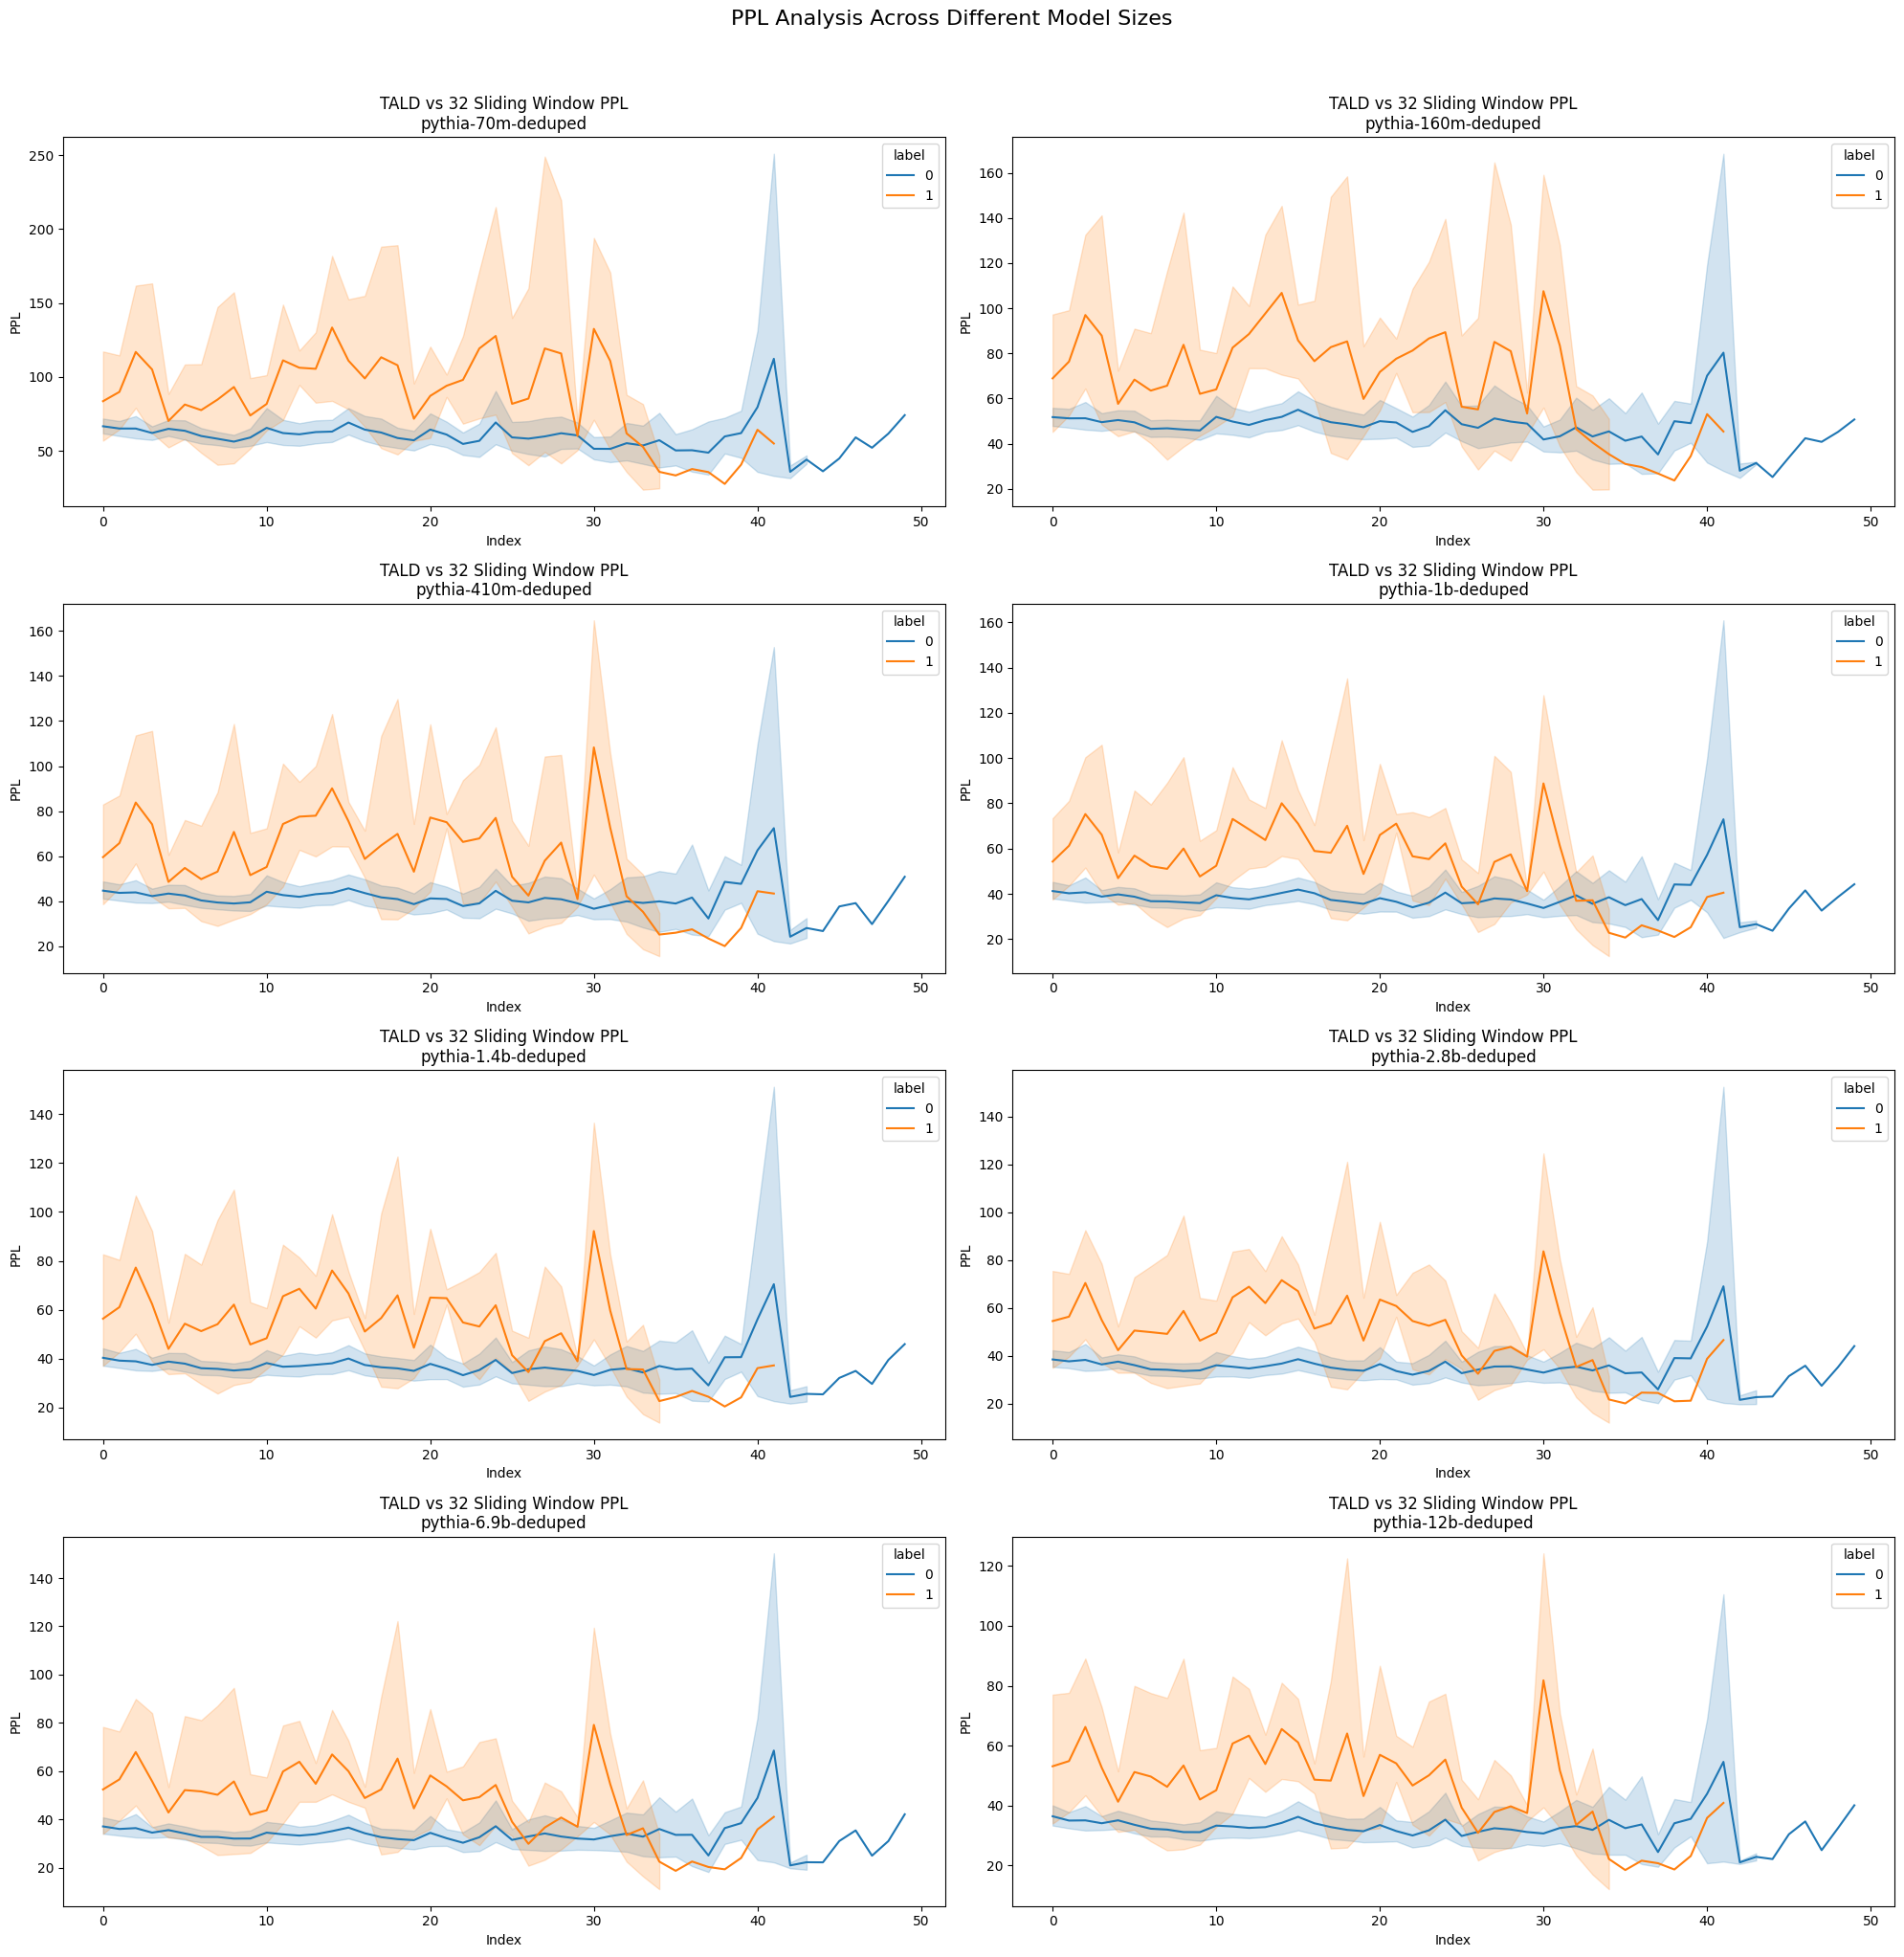

In [13]:
window = 32
fig, max_results, avg_results = analyze_ppl_across_models(
    sizes, window, data_base_path_no_ema
)
print("\nMax PPL Results:")
for result in max_results:
    print(result)

In [14]:
print("\nAverage PPL Results:")
for result in avg_results:
    print(result)


Average PPL Results:
pythia-70m-deduped
Spearman rho: 0.201	p-value: 0.002
pythia-160m-deduped
Spearman rho: 0.223	p-value: 0.000
pythia-410m-deduped
Spearman rho: 0.239	p-value: 0.000
pythia-1b-deduped
Spearman rho: 0.235	p-value: 0.000
pythia-1.4b-deduped
Spearman rho: 0.243	p-value: 0.000
pythia-2.8b-deduped
Spearman rho: 0.243	p-value: 0.000
pythia-6.9b-deduped
Spearman rho: 0.242	p-value: 0.000
pythia-12b-deduped
Spearman rho: 0.238	p-value: 0.000


## 64 Sliding Window

### Transcripts with aligned EMA


Max PPL Results:
pythia-70m-deduped
Spearman rho: 0.494	p-value: 0.000
pythia-160m-deduped
Spearman rho: 0.509	p-value: 0.000
pythia-410m-deduped
Spearman rho: 0.512	p-value: 0.000
pythia-1b-deduped
Spearman rho: 0.507	p-value: 0.000
pythia-1.4b-deduped
Spearman rho: 0.518	p-value: 0.000
pythia-2.8b-deduped
Spearman rho: 0.505	p-value: 0.000
pythia-6.9b-deduped
Spearman rho: 0.517	p-value: 0.000
pythia-12b-deduped
Spearman rho: 0.523	p-value: 0.000


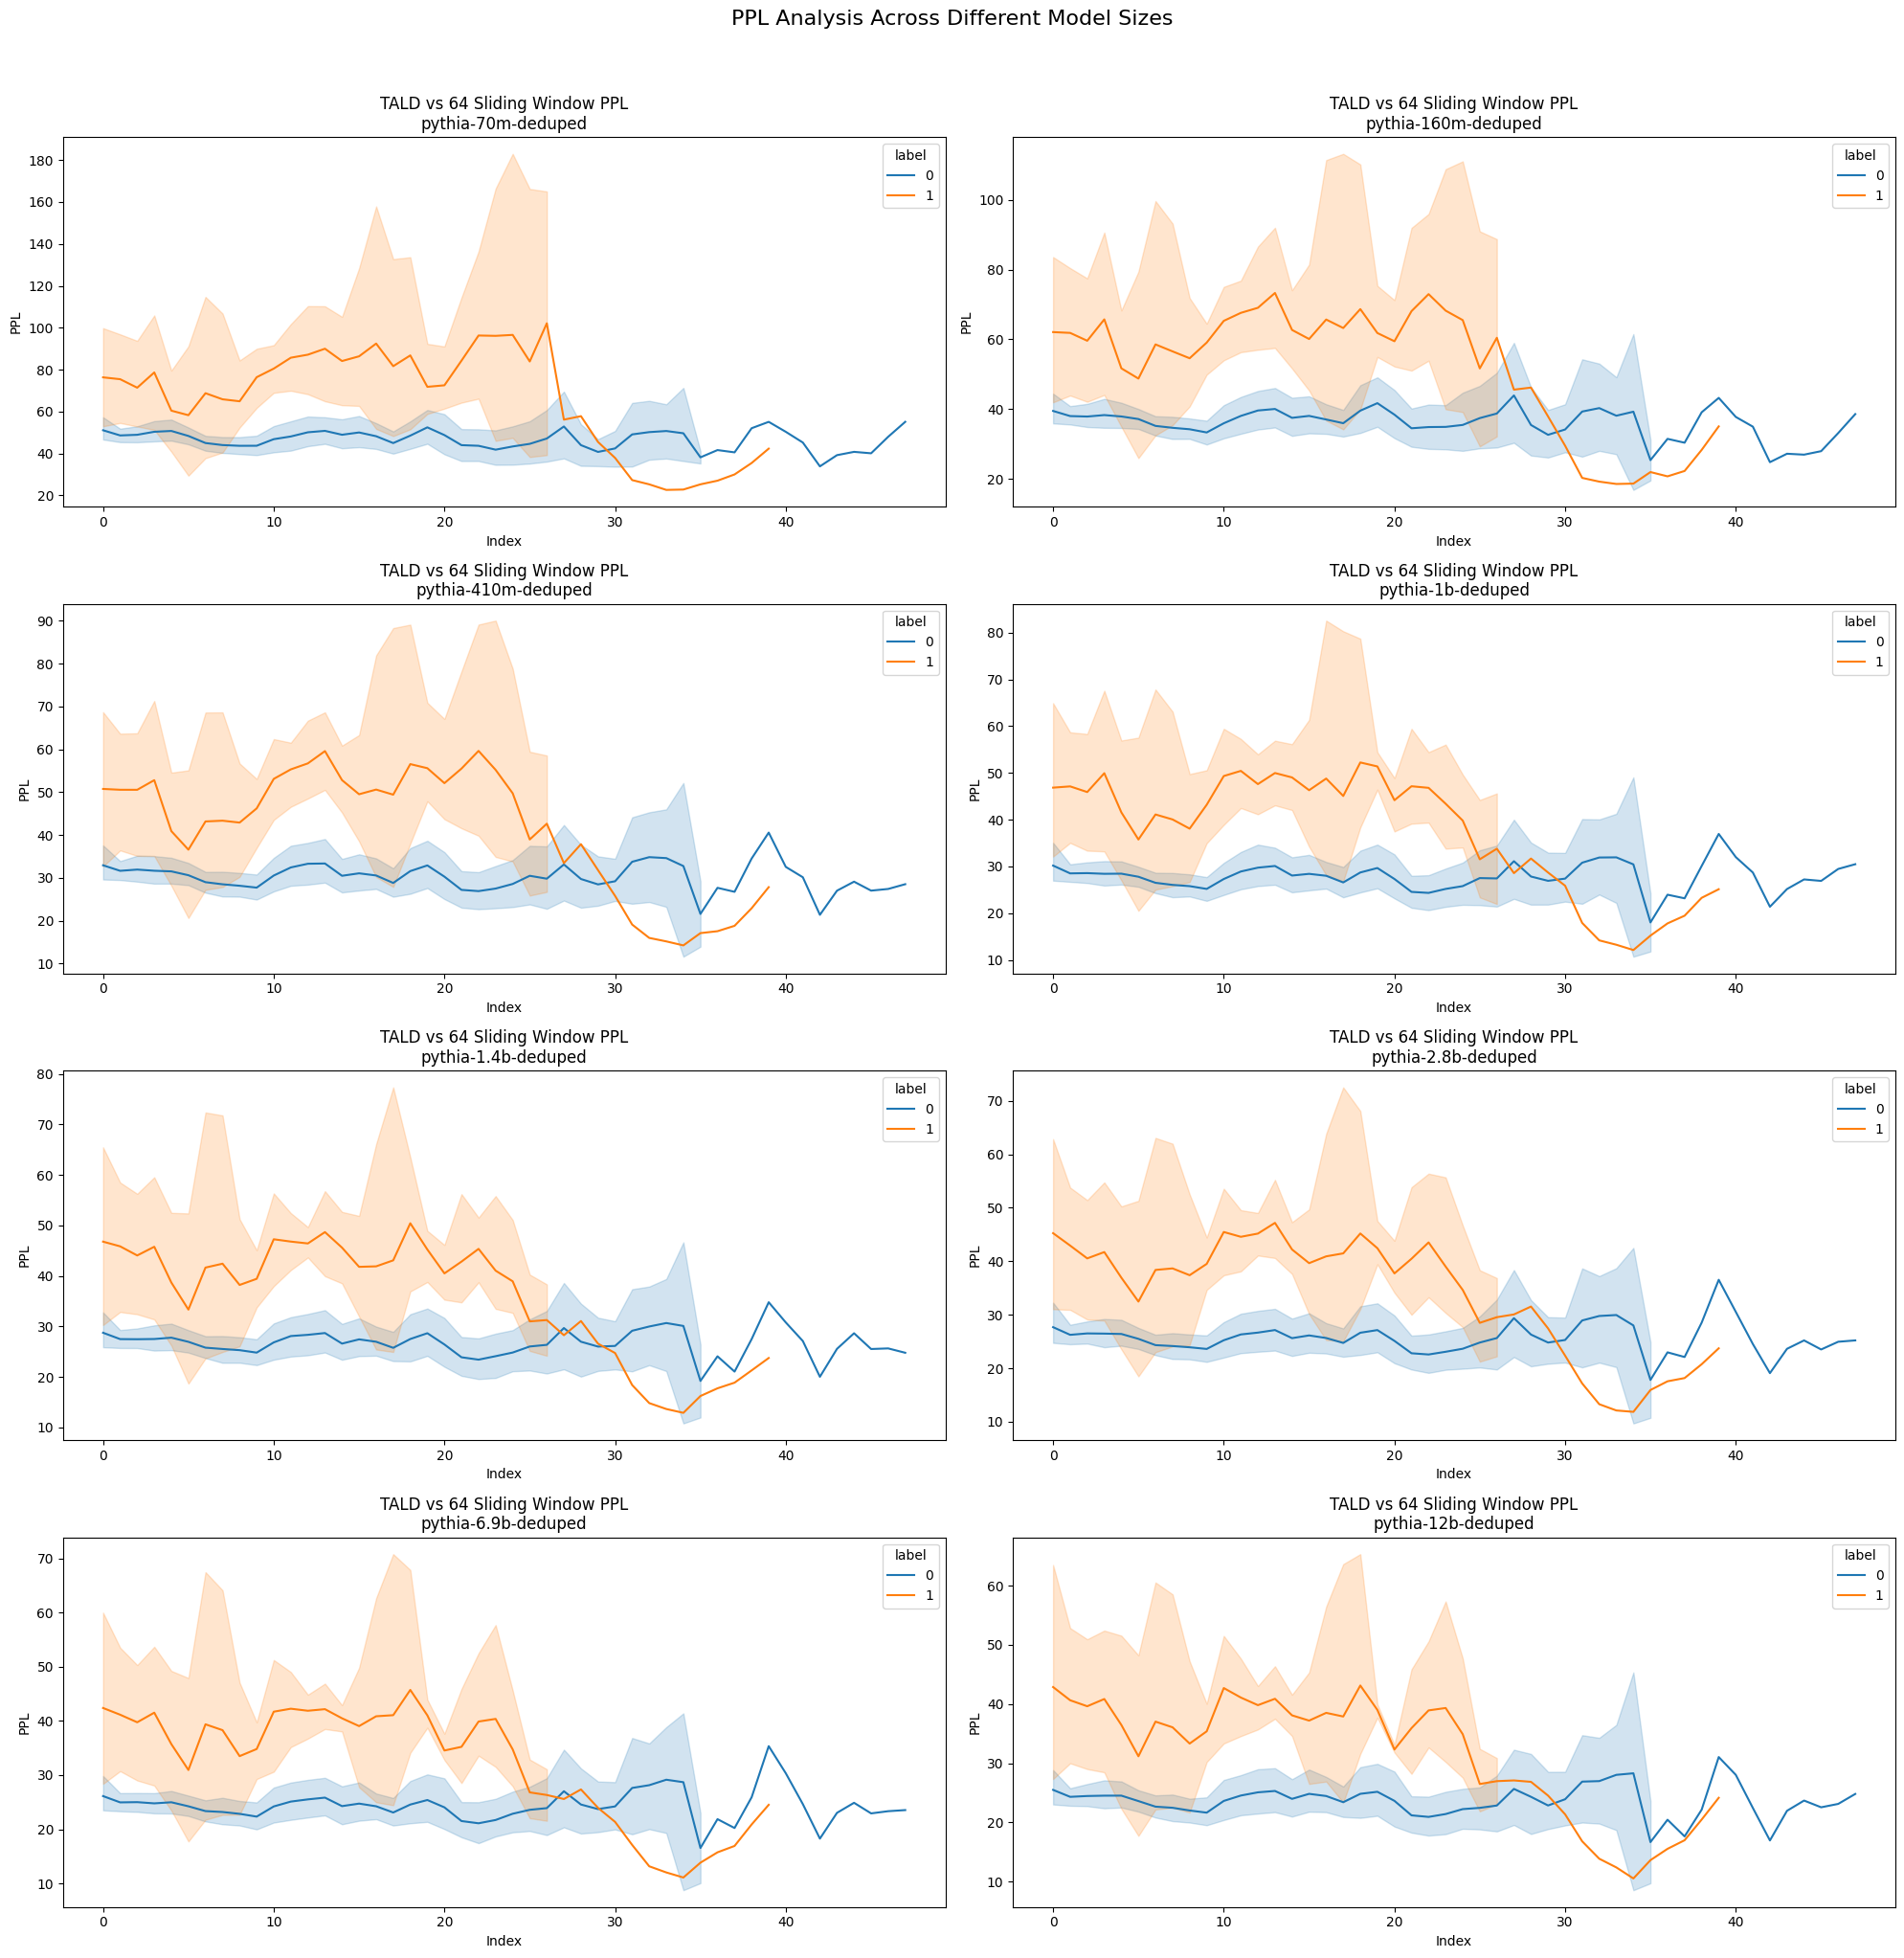

In [15]:
window = 64
fig, max_results, avg_results = analyze_ppl_across_models(
    sizes, window, data_base_path_ema
)
print("\nMax PPL Results:")
for result in max_results:
    print(result)

In [16]:
print("\nAverage PPL Results:")
for result in avg_results:
    print(result)


Average PPL Results:
pythia-70m-deduped
Spearman rho: 0.297	p-value: 0.000
pythia-160m-deduped
Spearman rho: 0.326	p-value: 0.000
pythia-410m-deduped
Spearman rho: 0.350	p-value: 0.000
pythia-1b-deduped
Spearman rho: 0.342	p-value: 0.000
pythia-1.4b-deduped
Spearman rho: 0.357	p-value: 0.000
pythia-2.8b-deduped
Spearman rho: 0.348	p-value: 0.000
pythia-6.9b-deduped
Spearman rho: 0.358	p-value: 0.000
pythia-12b-deduped
Spearman rho: 0.360	p-value: 0.000


### Transcripts with TALD score only


Max PPL Results:
pythia-70m-deduped
Spearman rho: 0.439	p-value: 0.000
pythia-160m-deduped
Spearman rho: 0.462	p-value: 0.000
pythia-410m-deduped
Spearman rho: 0.467	p-value: 0.000
pythia-1b-deduped
Spearman rho: 0.461	p-value: 0.000
pythia-1.4b-deduped
Spearman rho: 0.488	p-value: 0.000
pythia-2.8b-deduped
Spearman rho: 0.472	p-value: 0.000
pythia-6.9b-deduped
Spearman rho: 0.485	p-value: 0.000
pythia-12b-deduped
Spearman rho: 0.481	p-value: 0.000


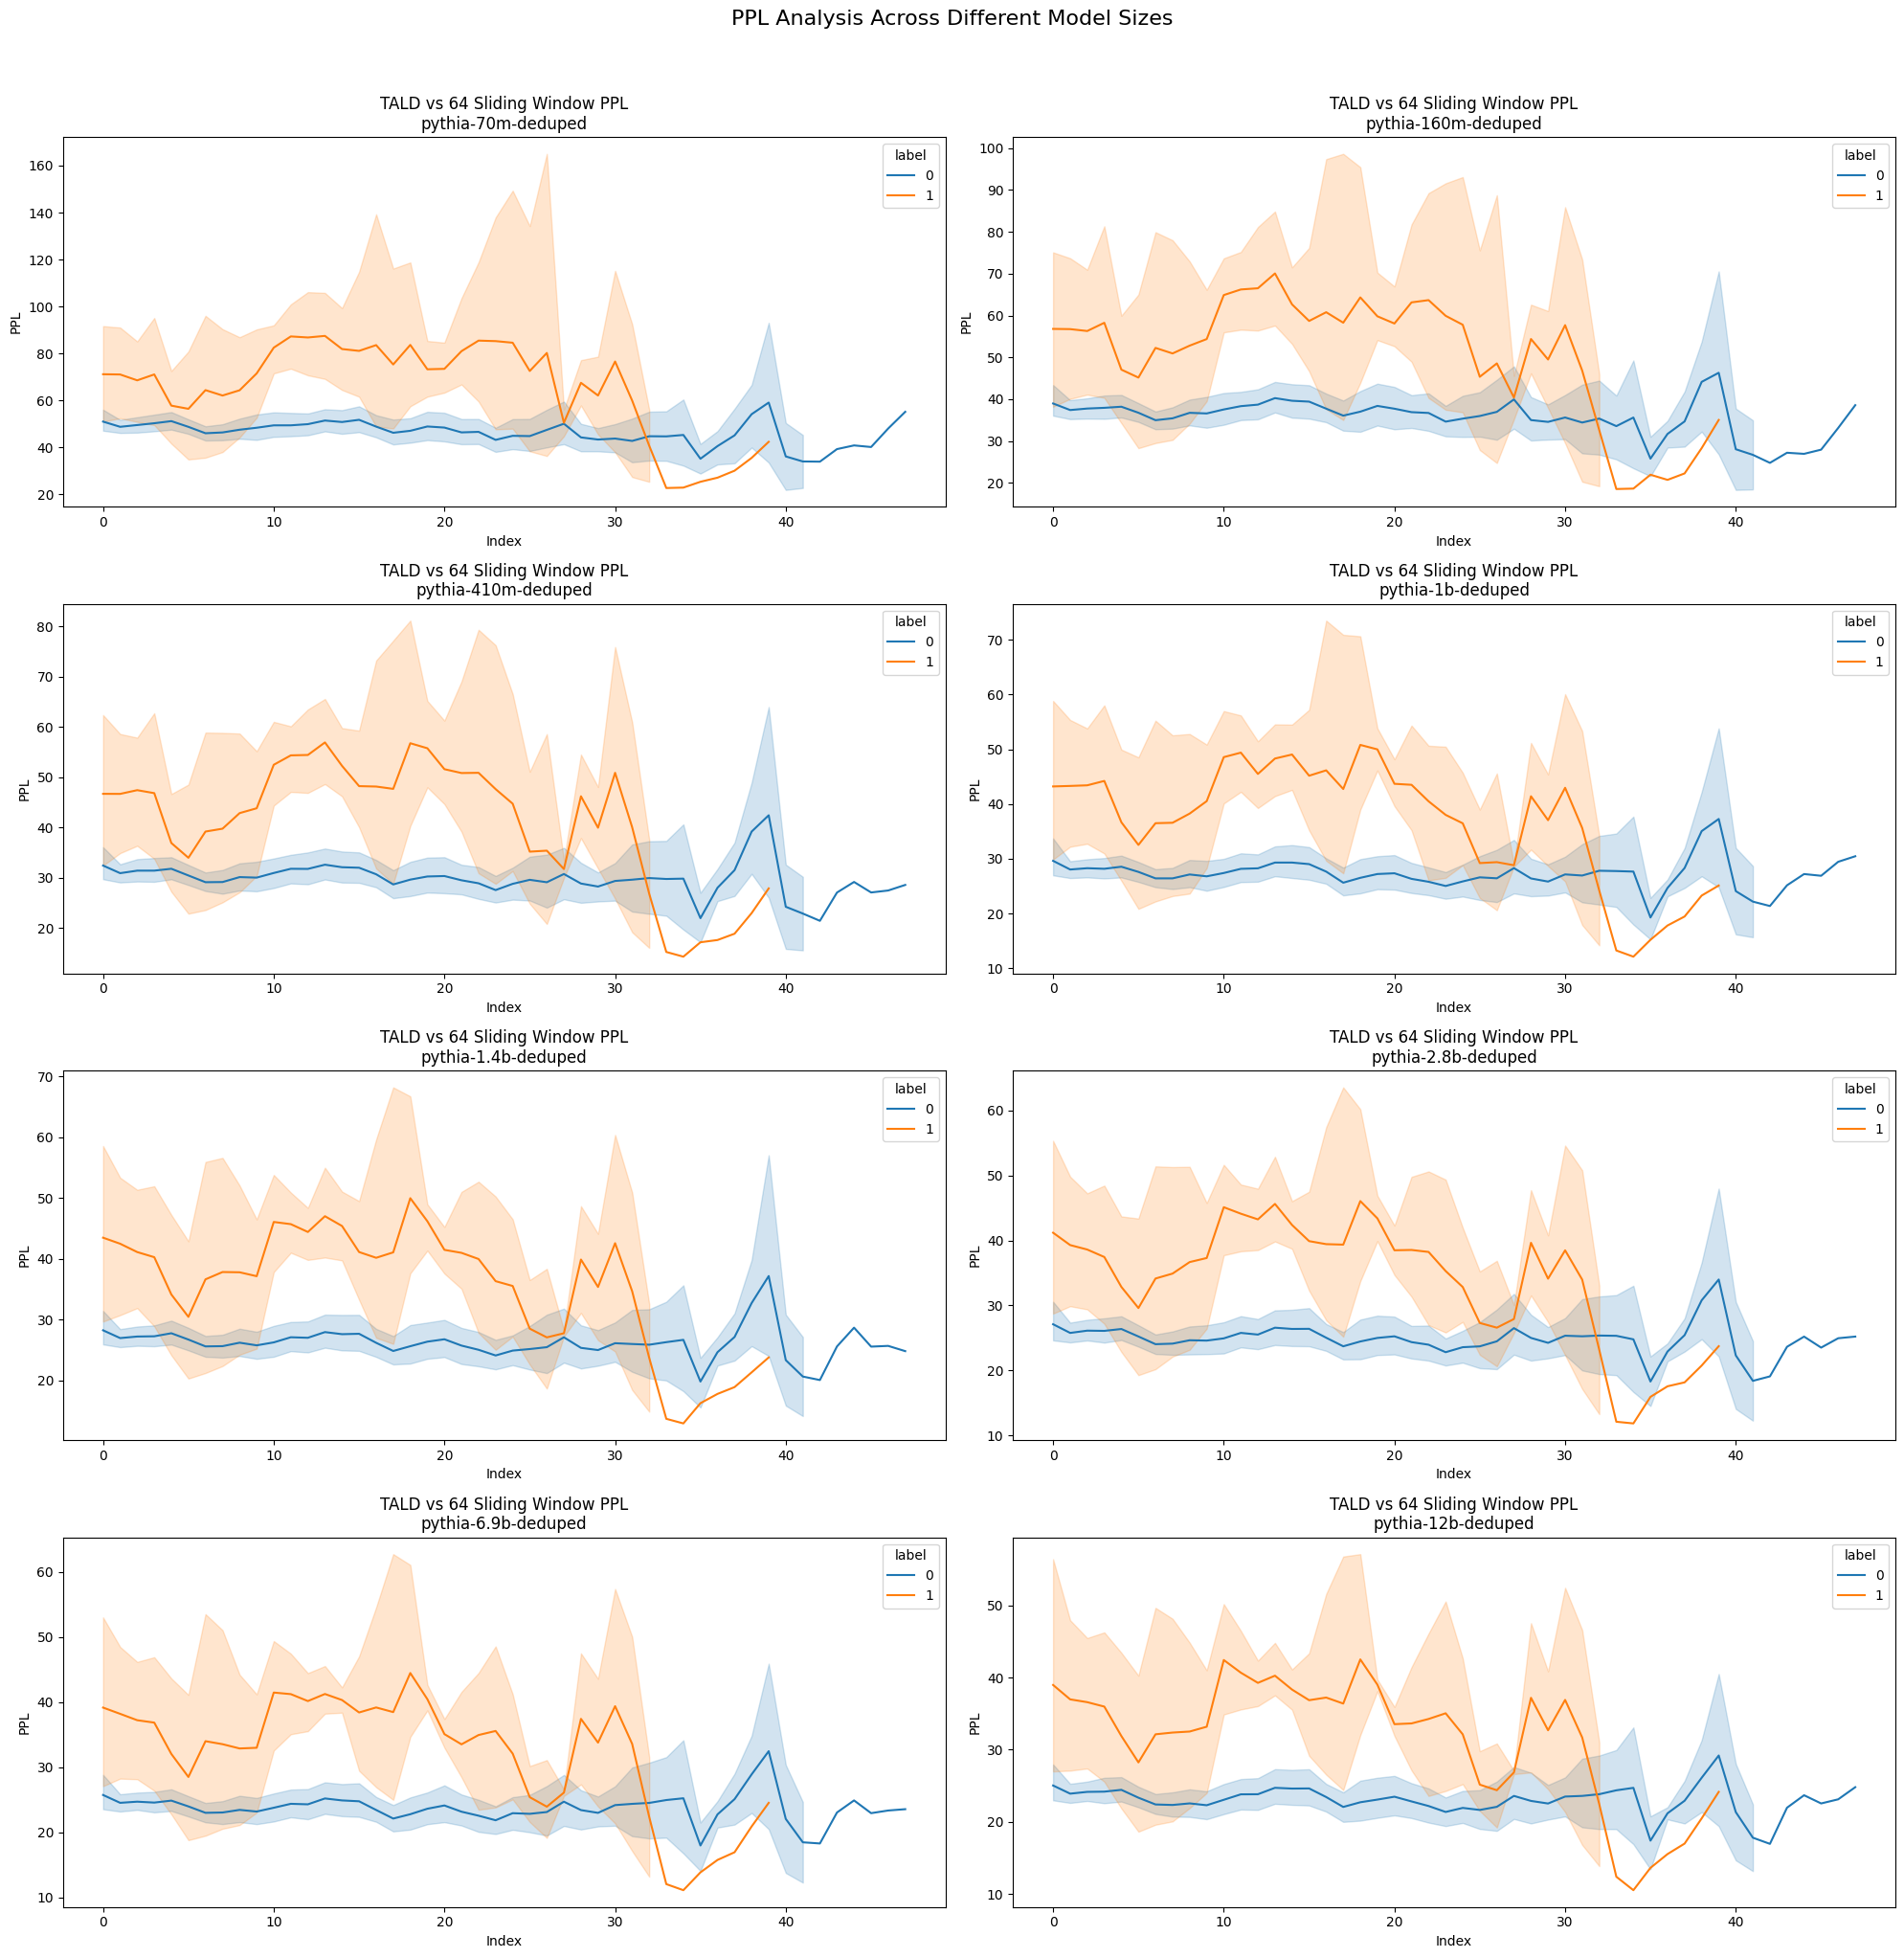

In [3]:
window = 64
fig, max_results, avg_results = analyze_ppl_across_models(
    sizes, window, data_base_path_no_ema
)
print("\nMax PPL Results:")
for result in max_results:
    print(result)
fig.savefig("../figs/max_avh_ppl.pdf", dpi=300)

In [18]:
print("\nAverage PPL Results:")
for result in avg_results:
    print(result)


Average PPL Results:
pythia-70m-deduped
Spearman rho: 0.247	p-value: 0.000
pythia-160m-deduped
Spearman rho: 0.272	p-value: 0.000
pythia-410m-deduped
Spearman rho: 0.286	p-value: 0.000
pythia-1b-deduped
Spearman rho: 0.277	p-value: 0.000
pythia-1.4b-deduped
Spearman rho: 0.299	p-value: 0.000
pythia-2.8b-deduped
Spearman rho: 0.293	p-value: 0.000
pythia-6.9b-deduped
Spearman rho: 0.304	p-value: 0.000
pythia-12b-deduped
Spearman rho: 0.299	p-value: 0.000


## 128 Sliding Windows

### Transcripts with aligned EMA


Max PPL Results:
pythia-70m-deduped
Spearman rho: 0.386	p-value: 0.000
pythia-160m-deduped
Spearman rho: 0.401	p-value: 0.000
pythia-410m-deduped
Spearman rho: 0.419	p-value: 0.000
pythia-1b-deduped
Spearman rho: 0.393	p-value: 0.000
pythia-1.4b-deduped
Spearman rho: 0.420	p-value: 0.000
pythia-2.8b-deduped
Spearman rho: 0.402	p-value: 0.000
pythia-6.9b-deduped
Spearman rho: 0.410	p-value: 0.000
pythia-12b-deduped
Spearman rho: 0.419	p-value: 0.000


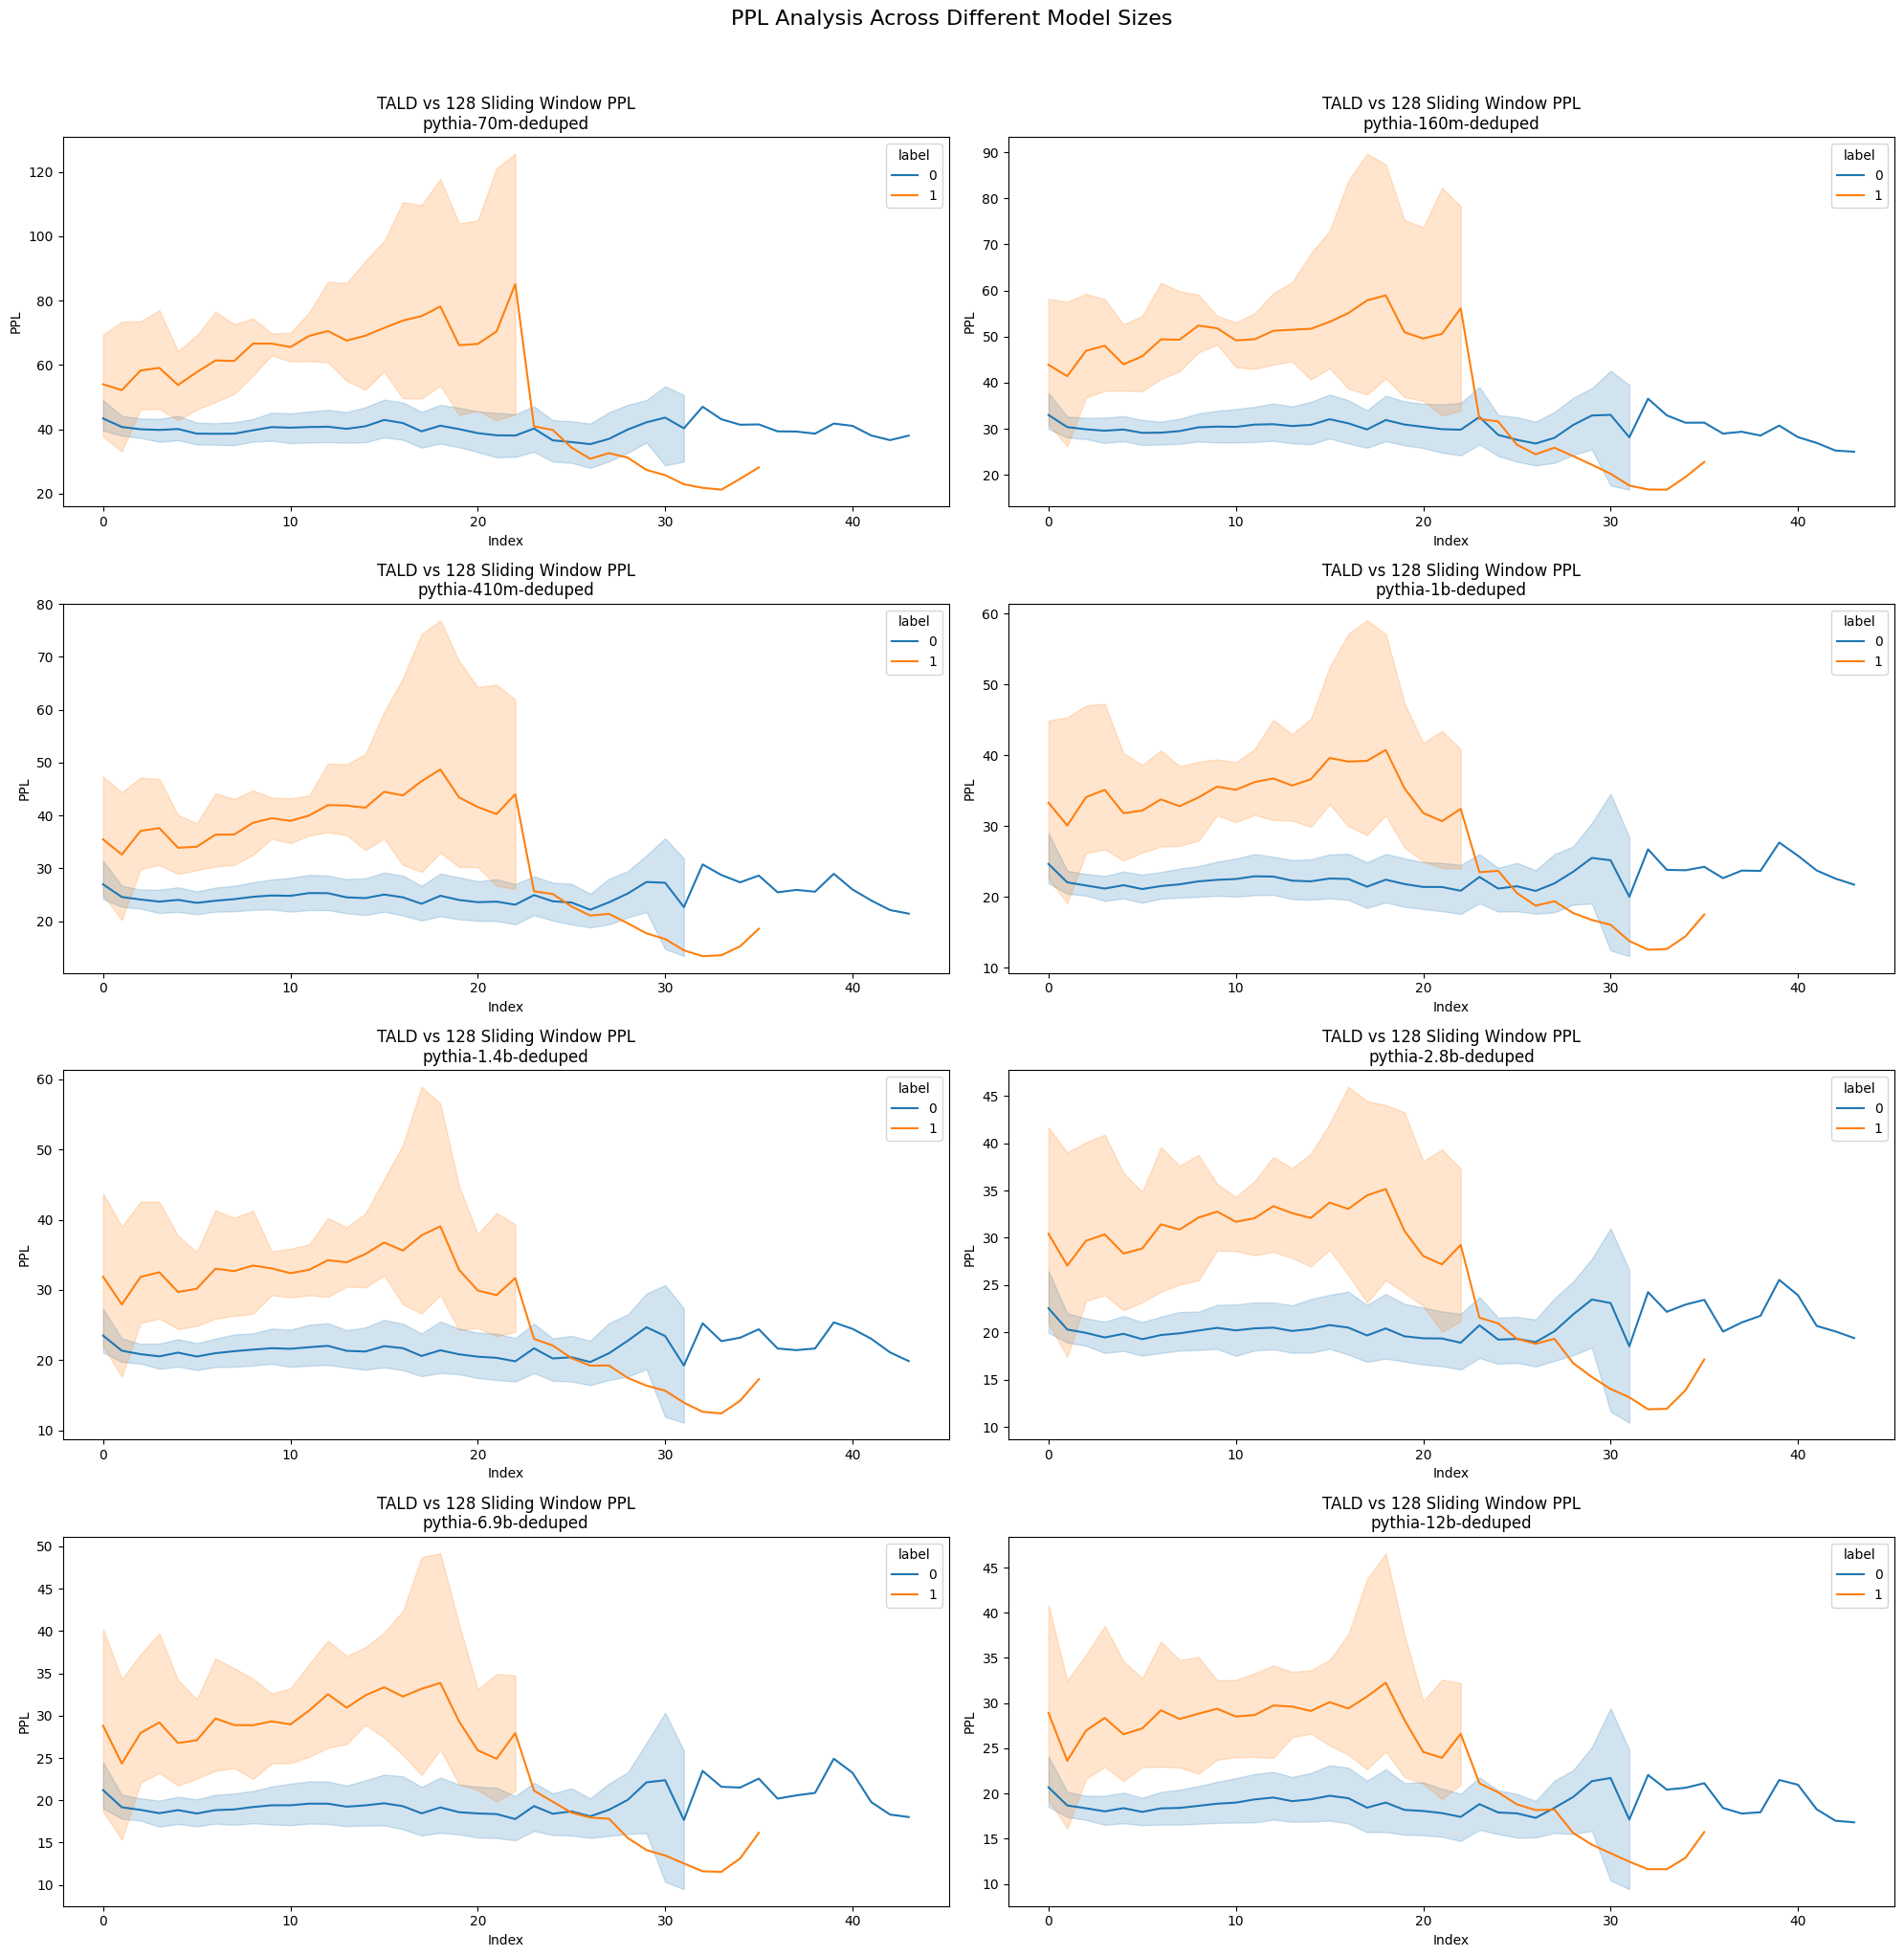

In [19]:
window = 128
fig, max_results, avg_results = analyze_ppl_across_models(
    sizes, window, data_base_path_ema
)
print("\nMax PPL Results:")
for result in max_results:
    print(result)

In [20]:
print("\nAverage PPL Results:")
for result in avg_results:
    print(result)


Average PPL Results:
pythia-70m-deduped
Spearman rho: 0.249	p-value: 0.000
pythia-160m-deduped
Spearman rho: 0.270	p-value: 0.000
pythia-410m-deduped
Spearman rho: 0.288	p-value: 0.000
pythia-1b-deduped
Spearman rho: 0.258	p-value: 0.000
pythia-1.4b-deduped
Spearman rho: 0.290	p-value: 0.000
pythia-2.8b-deduped
Spearman rho: 0.272	p-value: 0.000
pythia-6.9b-deduped
Spearman rho: 0.281	p-value: 0.000
pythia-12b-deduped
Spearman rho: 0.286	p-value: 0.000


### Transcripts with TALD score only


Max PPL Results:
pythia-70m-deduped
Spearman rho: 0.378	p-value: 0.000
pythia-160m-deduped
Spearman rho: 0.397	p-value: 0.000
pythia-410m-deduped
Spearman rho: 0.409	p-value: 0.000
pythia-1b-deduped
Spearman rho: 0.383	p-value: 0.000
pythia-1.4b-deduped
Spearman rho: 0.412	p-value: 0.000
pythia-2.8b-deduped
Spearman rho: 0.390	p-value: 0.000
pythia-6.9b-deduped
Spearman rho: 0.405	p-value: 0.000
pythia-12b-deduped
Spearman rho: 0.405	p-value: 0.000


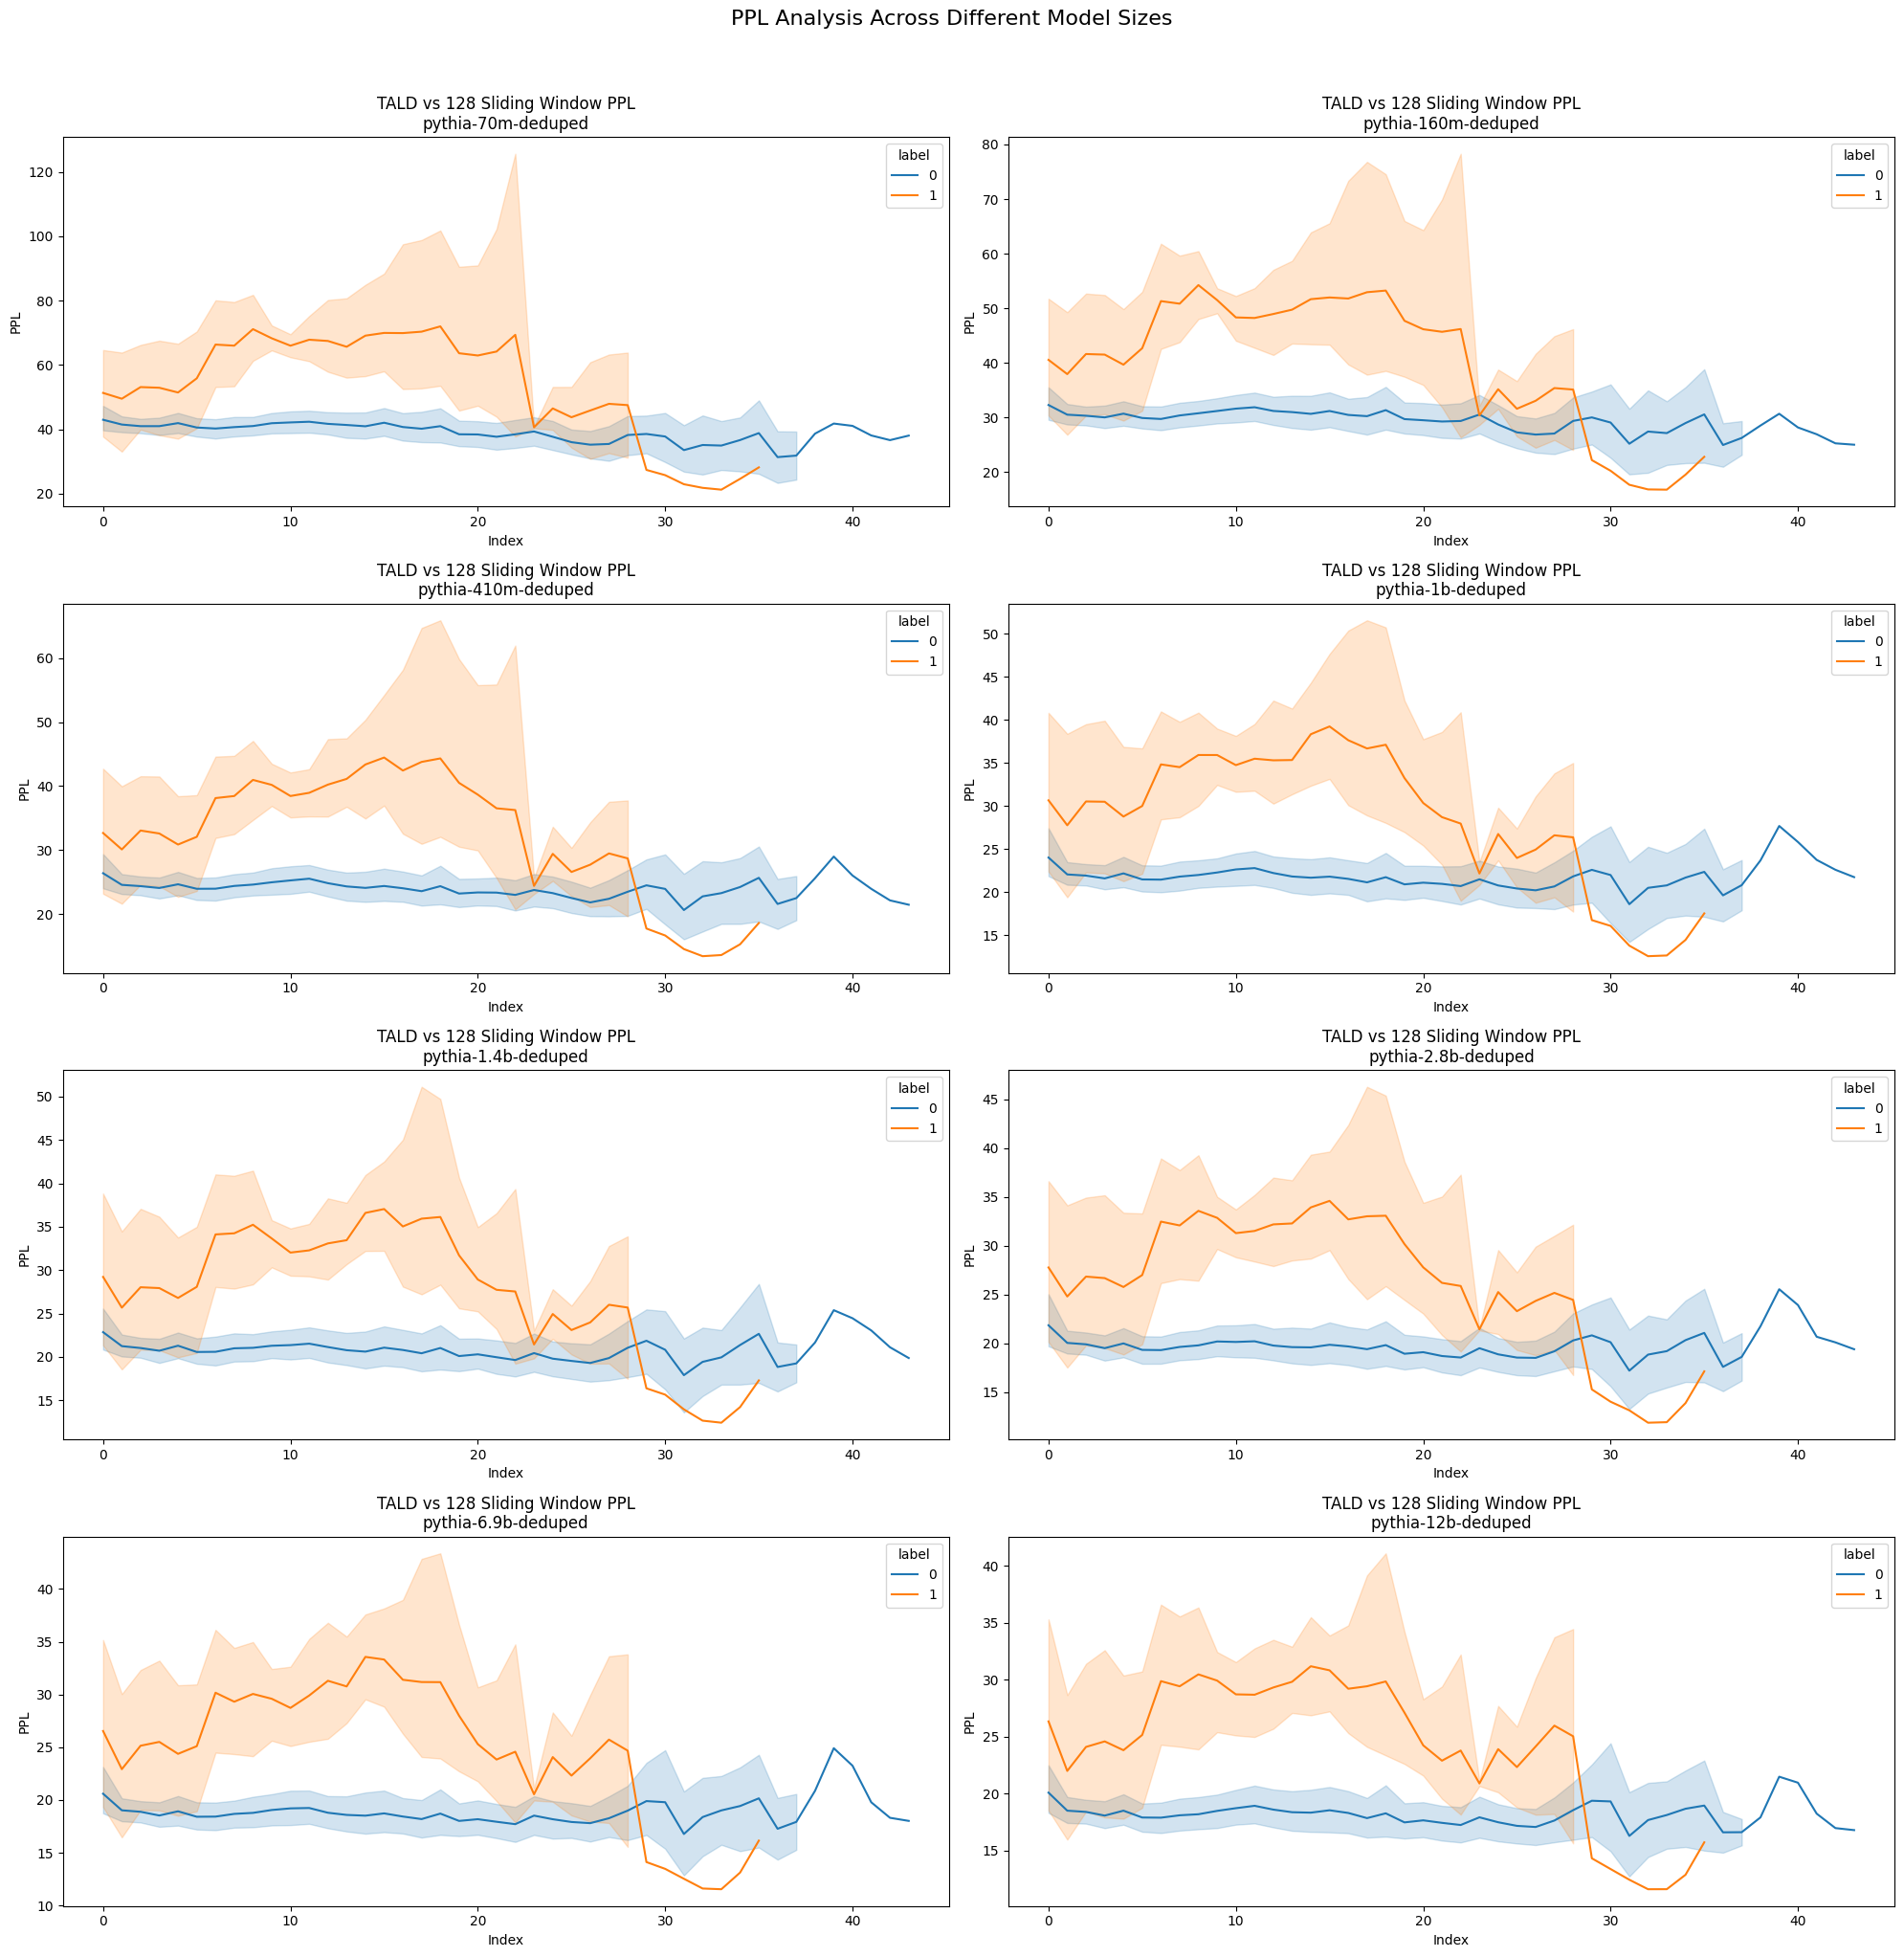

In [21]:
window = 128
fig, max_results, avg_results = analyze_ppl_across_models(
    sizes, window, data_base_path_no_ema
)
print("\nMax PPL Results:")
for result in max_results:
    print(result)

In [22]:
print("\nAverage PPL Results:")
for result in avg_results:
    print(result)


Average PPL Results:
pythia-70m-deduped
Spearman rho: 0.212	p-value: 0.001
pythia-160m-deduped
Spearman rho: 0.229	p-value: 0.000
pythia-410m-deduped
Spearman rho: 0.240	p-value: 0.000
pythia-1b-deduped
Spearman rho: 0.216	p-value: 0.001
pythia-1.4b-deduped
Spearman rho: 0.242	p-value: 0.000
pythia-2.8b-deduped
Spearman rho: 0.232	p-value: 0.000
pythia-6.9b-deduped
Spearman rho: 0.243	p-value: 0.000
pythia-12b-deduped
Spearman rho: 0.241	p-value: 0.000
